<center><h1>Stack Overflow Developer Survey 2019 CRISP-DM

# Questions of Interest

What programming language should you start learning? The answer to this answer changes year by year, and of course it mostly depends on what you want to do. Since I am still new to the data science field, I thought it might be interesting to take a closer look at the following questions:
- Which are currently the most commonly used programming languages?
- How has the prevalence of programming language usage changed over the last 5 years?
- How do different types of developers differ in their choice of language?



# Understanding the Data

I used the Stack Overflow Developer Survey 2019, the most recent year, to focus on. For a time series graph, I also used the 2015-2018 survey data to analyze which programming languages were being used during those years.


In [2]:
# change global printing options as necessary
pd.options.display.max_columns = 200
pd.options.display.max_rows = 30

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import timeit

%matplotlib inline

In [2]:
# import modules
import visuals as v
import data_preprocessing as p

In [56]:
#load processed dataframes created and saved previously
df2019_ini = pd.read_csv('./df19_unprocessed.csv', index_col = 0)

In [3]:
#import the 2015-2019 surveys
df2019 = pd.read_csv('./2019survey_results_public.csv', header = 0, skipinitialspace= True, low_memory=False)
df2018 = pd.read_csv('./2018survey_results_public.csv', header = 0, skipinitialspace= True, low_memory=False)
df2017 = pd.read_csv('./2017survey_results_public.csv', header = 0, skipinitialspace= True, low_memory=False)
df2016 = pd.read_csv('./2016survey_results.csv', header = 0, skipinitialspace= True, low_memory=False)
df2015 = pd.read_csv('./2015survey_results.csv', header = 1, skipinitialspace= True, low_memory=False)

In [4]:
#take a look at the data
display(df2019.head(), df2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


None

In [5]:
display(df2018.head(), df2018.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


None

In [6]:
display(df2017.head(), df2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


None

In [7]:
display(df2016.head(), df2016.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56030 entries, 0 to 56029
Data columns (total 66 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        56030 non-null  int64  
 1   collector                         56030 non-null  object 
 2   country                           55528 non-null  object 
 3   un_subregion                      55313 non-null  object 
 4   so_region                         55390 non-null  object 
 5   age_range                         55727 non-null  object 
 6   age_midpoint                      55336 non-null  float64
 7   gender                            55586 non-null  object 
 8   self_identification               54202 non-null  object 
 9   occupation                        49519 non-null  object 
 10  occupation_group                  46934 non-null  object 
 11  experience_range                  49520 non-null  object 
 12  expe

,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,...,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
0,1888,Facebook,Afghanistan,Southern Asia,Central Asia,20-24,22.0,Male,Programmer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4637,Facebook,Afghanistan,Southern Asia,Central Asia,30-34,32.0,Male,Developer; Engineer; Programmer,Mobile developer - iOS,...,This is somewhat important,This is very important,This is very important,I don't care about this,This is somewhat important,This is somewhat important,I don't care about this,I don't care about this,Unrealistic expectations; Interacting with non...,To get help for my job; Because I can't do my ...
2,11164,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21378,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,Female,Engineer,DevOps,...,I don't care about this,This is somewhat important,This is very important,This is very important,I don't care about this,I don't care about this,This is very important,This is somewhat important,Corporate policies; Interacting with non-techn...,To get help for my job; Beacause I love to learn
4,30280,Facebook,Afghanistan,Southern Asia,Central Asia,> 60,65.0,Prefer not to disclose,Developer; Engineer; Programmer; Sr. Developer...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


None

In [8]:
display(df2015.head(), df2015.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26086 entries, 0 to 26085
Columns: 222 entries, Country to Why answer: I don't answer but I want to
dtypes: object(222)
memory usage: 44.2+ MB


,Country,Age,Gender,Tabs or Spaces,Years IT / Programming Experience,Occupation,Desktop Operating System,Desktop Operating System: write-in,Current Lang & Tech: Android,Current Lang & Tech: Arduino,...,Why use Stack Overflow: I don't use Stack Overflow,How often are Stack Overflow's answers helpful,Why answer: Help a programmer in need,Why answer: Help future programmers,Why answer: Demonstrate expertise,Why answer: Self promotion,Why answer: Sense of responsibility to developers,Why answer: No idea,Why answer: I don't answer and I don't want to,Why answer: I don't answer but I want to
0,Croatia,25-29,Male,Tabs,2 - 5 years,Back-end web developer,Ubuntu,NaN,NaN,NaN,...,NaN,Usually,NaN,NaN,It feels good to demonstrate my expertise.,Demonstrating my expertise will benefit me,I feel a sense of responsibility to the develo...,NaN,NaN,NaN
1,France,20-24,Male,Spaces,1 - 2 years,Back-end web developer,Windows 7,NaN,NaN,NaN,...,NaN,Usually,NaN,My answer will help lots of people who have th...,It feels good to demonstrate my expertise.,NaN,NaN,NaN,NaN,NaN
2,India,20-24,Male,Tabs,1 - 2 years,Back-end web developer,Windows 7,NaN,NaN,NaN,...,NaN,Rarely,NaN,NaN,NaN,Demonstrating my expertise will benefit me,NaN,NaN,NaN,NaN
3,Latvia,25-29,Male,It depends,6 - 10 years,Back-end web developer,Ubuntu,NaN,NaN,NaN,...,NaN,Usually,It feels good to help a programmer in need,My answer will help lots of people who have th...,It feels good to demonstrate my expertise.,Demonstrating my expertise will benefit me,I feel a sense of responsibility to the develo...,NaN,NaN,NaN
4,Norway,30-34,Male,Tabs,2 - 5 years,Back-end web developer,Windows 8,NaN,NaN,NaN,...,NaN,Usually,It feels good to help a programmer in need,NaN,NaN,Demonstrating my expertise will benefit me,NaN,NaN,NaN,"I don't answer much (or at all), but I want to..."


None

In [9]:
#take a look at which are currently the numerical features
df2019.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [4]:
#get an idea of the amount of missing information in each feature
p.investigate_nan_threshold(df2019, 5, 25)

There are 17 columns with more than 25% of data missing.
['MgrIdiot', 'MgrMoney', 'MgrWant', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'WebFrameWorkedWith', 'WebFrameDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear', 'BlockchainOrg', 'BlockchainIs']
--------------------------------------
There are 11 columns with more than 30% of data missing.
['MgrIdiot', 'MgrMoney', 'MgrWant', 'CompTotal', 'ConvertedComp', 'CodeRevHrs', 'PurchaseHow', 'PurchaseWhat', 'MiscTechWorkedWith', 'BlockchainOrg', 'BlockchainIs']
--------------------------------------
There are 4 columns with more than 35% of data missing.
['CompTotal', 'ConvertedComp', 'CodeRevHrs', 'BlockchainOrg']
--------------------------------------
There are 2 columns with more than 40% of data missing.
['CodeRevHrs', 'BlockchainOrg']
--------------------------------------
There are 1 columns with more than 45% of data missing.
['BlockchainOrg']
----

['BlockchainOrg']

Country                0.148510
MainBranch             0.621041
SOVisitFreq            0.697546
SOComm                 0.846056
SOVisitTo              0.896684
                        ...    
MiscTechWorkedWith    32.961309
CompTotal             37.057705
ConvertedComp         37.194964
CodeRevHrs            43.982539
BlockchainOrg         45.799534
Name: % NaN Missing, Length: 82, dtype: float64


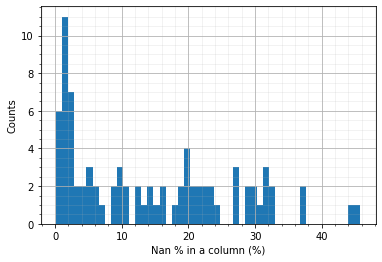

In [5]:
#find the amount of missing information in each column, 
#visualize the amount of missing data overall in the survey
missing_col_2019, missing_col_hist = p.assess_missing_col(df2019)


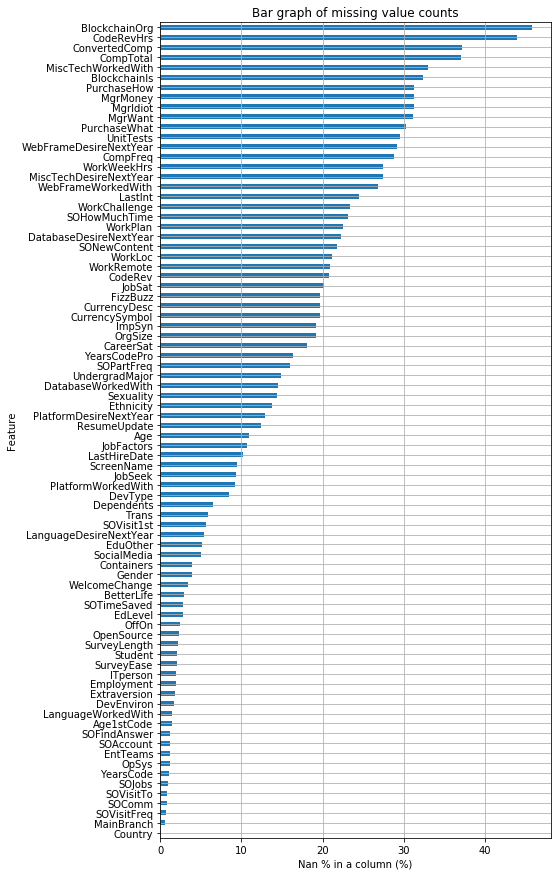

In [39]:
#visualize a bar graph showing the percentage of missing data in each column
missing_col_2019.plot(kind='barh', figsize = (7,15))
plt.xlabel('Nan % in a column (%)')
plt.ylabel('Feature')
plt.title('Bar graph of missing value counts')
plt.grid(True)
plt.show()

50809     1.176471
65856     1.176471
65857     1.176471
65860     1.176471
65861     1.176471
           ...    
88847    96.470588
88403    96.470588
88610    96.470588
88458    96.470588
88790    96.470588
Name: % NaN Missing, Length: 85408, dtype: float64


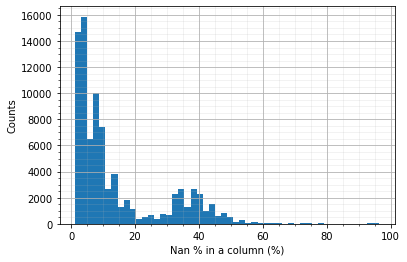

In [40]:
#assess amount of missing information in each row
df2019_tp = df2019.transpose()
missing_row_2019, missing_row_hist = p.assess_missing_col(df2019_tp)

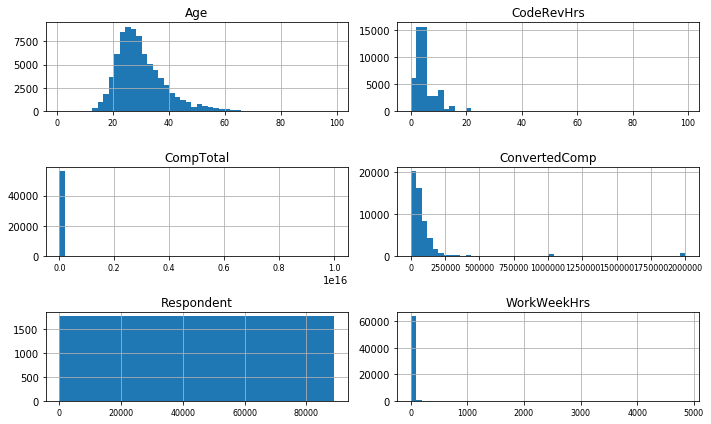

In [13]:
df2019.hist(bins = 50, figsize = (10, 6), grid = True, layout = (3, 2), xlabelsize = 8)
plt.tight_layout()


#df2019['Age'].hist(bins = 50, figsize = (10, 6))
#df2019['CodeRevHrs'].hist(bins = 50, figsize = (10, 6))
#df2019['WorkWeekHrs'].hist(bins = 50, figsize = (10, 6))

### Interpreting the first look at the data histograms

The Respondent plot can be safety ignored, since that column is just storing the identification number assigned to each submitted survey. There's nothing of note since all respondents are numbered sequentially with no missing numbers. 

The WorkWeekHrs feature, hours worked per week, raises a red flag since there are responses in the thousands (!). One week equals 168 hours. Since I personally do not know of a way to work more hours than there exists in one week(if you do, please contact me), I will be deleting the respondents that answered more than 100 hours per week. 

The remaining numerical features are markedly left skewed, with the exception of Age being less extreme in its skewedness.

Adjusting weights for skewed demographics - the official StackOverflow survey adjusted their data to account for skewed gender data - only 10% of respondents are female whereas the industry percentage is closer to 20%. I won't be adjusting weights, so my visuals will be slightly different from theirs.

In [24]:
df2019_uniques = pd.DataFrame()
for col in df2019.drop('Respondent', axis = 1):
    df2019_uniques[col] = pd.Series(df2019[col].unique())
    df2019_uniques_counts = df2019_uniques.count()

In [26]:
df2019_uniques_counts

MainBranch      5
Hobbyist        2
OpenSourcer     4
OpenSource      3
Employment      5
               ..
Sexuality       5
Ethnicity       5
Dependents      2
SurveyLength    3
SurveyEase      3
Length: 84, dtype: int64

In [27]:
df2019_uniques

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,"I am not primarily a developer, but I write co...",No,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",Web development or web design,Taken an online course in programming or softw...,...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,19.0,NaN,NaN,Bisexual,White or of European descent,Yes,Too long,Easy
2,I am a developer by profession,NaN,Once a month or more often,NaN,Employed full-time,Thailand,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Somewhat less welcome now than last year,Tech meetups or events in your area;Courses on...,28.0,Woman,Yes,NaN,White or of European descent;Multiracial,NaN,Too short,Difficult
3,I code primarily as a hobby,NaN,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...","Independent contractor, freelancer, or self-em...",United States,"Yes, part-time",Some college/university study without earning ...,Mathematics or statistics,Taken an online course in programming or softw...,...,Not applicable - I did not use Stack Overflow ...,NaN,22.0,"Non-binary, genderqueer, or gender non-conforming",NaN,Bisexual;Gay or Lesbian;Straight / Heterosexual,East Asian,NaN,NaN,NaN
4,"I used to be a developer by profession, but no...",NaN,NaN,NaN,NaN,Ukraine,NaN,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Another engineering discipline (ex. civil, ele...","Taught yourself a new language, framework, or ...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Tech...,30.0,"Woman;Non-binary, genderqueer, or gender non-c...",NaN,Gay or Lesbian,Black or of African descent;East Asian;Hispani...,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,Employed part-time,Canada,NaN,"Other doctoral degree (Ph.D, Ed.D., etc.)","Information systems, information technology, o...",Taken an online course in programming or softw...,...,NaN,Courses on technologies you're interested in,42.0,"Woman;Man;Non-binary, genderqueer, or gender n...",NaN,Bisexual;Gay or Lesbian,Black or of African descent,NaN,NaN,NaN


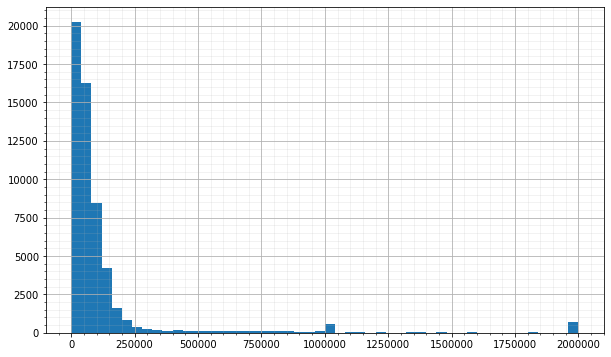

In [14]:
df2019['ConvertedComp'].hist(bins = 50, figsize = (10, 6))
plt.minorticks_on()
plt.grid(b=True, which='minor', alpha=0.2)

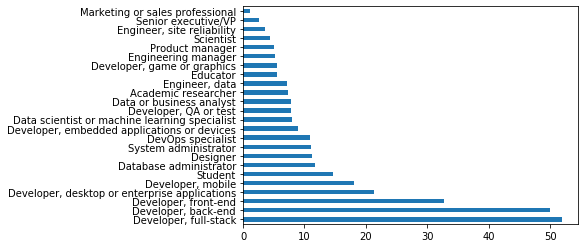

In [4]:
p.process_col_of_lists(df2019, 'DevType', create_plot=True)

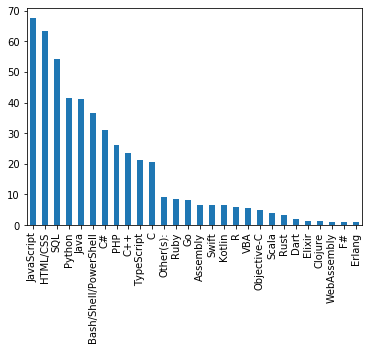

In [4]:
p.process_col_of_lists(df2019, 'LanguageWorkedWith', create_plot = True)

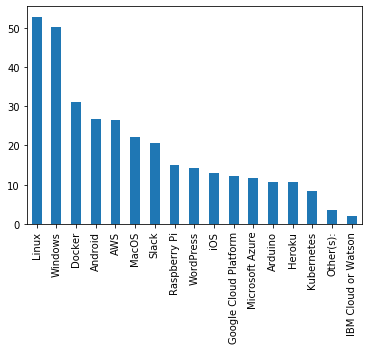

In [6]:
p.process_col_of_lists(df2019, 'PlatformWorkedWith', create_plot = True)

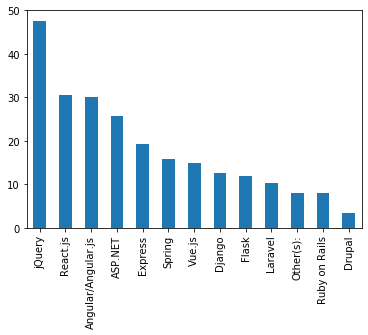

In [11]:
p.process_col_of_lists(df2019, 'WebFrameWorkedWith', create_plot = True)

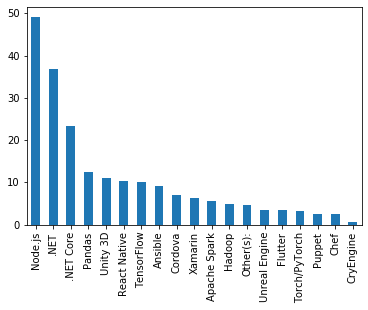

In [12]:
p.process_col_of_lists(df2019, 'MiscTechWorkedWith', create_plot = True)

#### Education

No                65816
Yes, full-time    15769
Yes, part-time     5429
Name: Student, dtype: int64


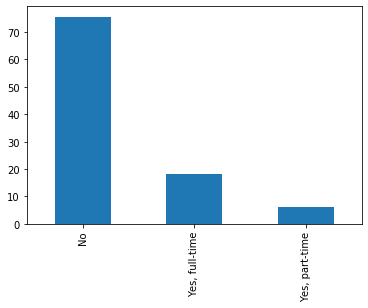

In [13]:
p.plot_simple_col(df2019, 'Student')

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              39134
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           19569
Some college/university study without earning a degree                                10502
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8642
Associate degree                                                                       2938
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2432
Primary/elementary school                                                              1422
Professional degree (JD, MD, etc.)                                                     1198
I never completed any formal education                                                  553
Name: EdLevel, dtype: int64


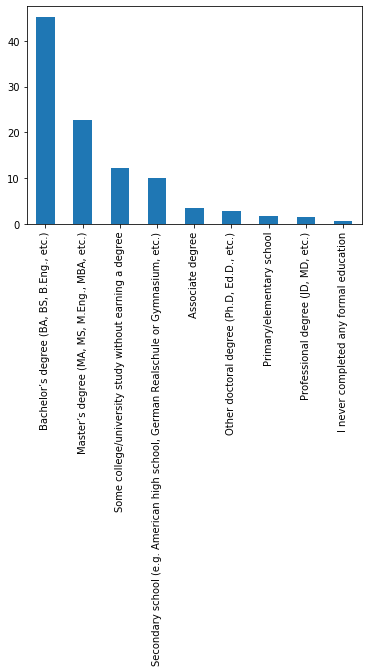

In [7]:
p.plot_simple_col(df2019, 'EdLevel')

Computer science, computer engineering, or software engineering          47214
Another engineering discipline (ex. civil, electrical, mechanical)        6222
Information systems, information technology, or system administration     5253
Web development or web design                                             3422
A natural science (ex. biology, chemistry, physics)                       3232
Mathematics or statistics                                                 2975
A business discipline (ex. accounting, finance, marketing)                1841
A humanities discipline (ex. literature, history, philosophy)             1571
A social science (ex. anthropology, psychology, political science)        1352
Fine arts or performing arts (ex. graphic design, music, studio art)      1233
I never declared a major                                                   976
A health science (ex. nursing, pharmacy, radiology)                        323
Name: UndergradMajor, dtype: int64


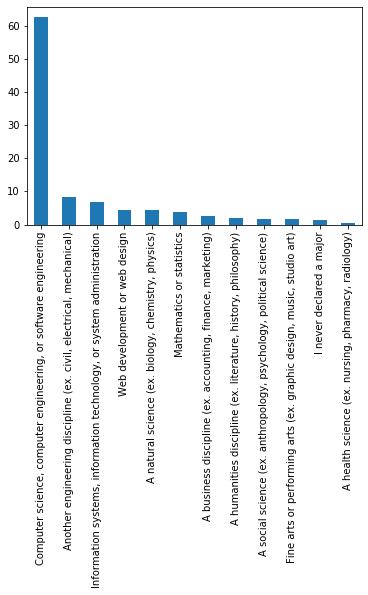

In [4]:
p.plot_simple_col(df2019, 'UndergradMajor')

#### Demographics

Man                                                            77919
Woman                                                           6344
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64


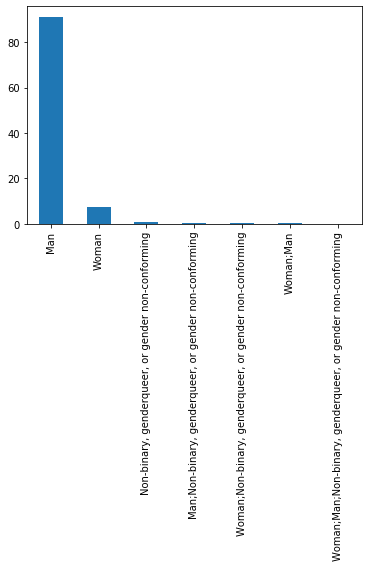

In [8]:
p.plot_simple_col(df2019, 'Gender')

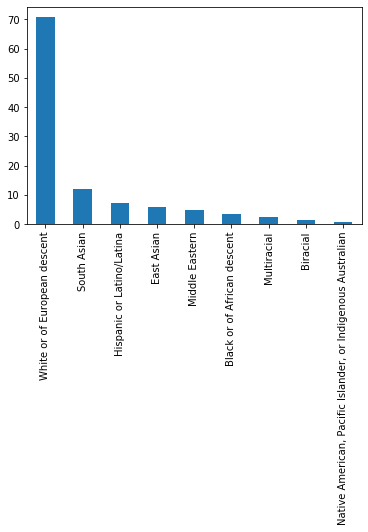

In [10]:
p.process_col_of_lists(df2019, 'Ethnicity', create_plot = True)

In [174]:
df2019_explode = p.explode_col(df2019_test, 'DevType', ';')
#later
#df2019.groupby(['LanguageWorkedWith']).mean()['JobSat']
df2019_explode.groupby(['LanguageWorkedWith']).mean()['ConvertedComp']

LanguageWorkedWith
Assembly                                                                                     28846.741935
Assembly;Bash/Shell/PowerShell                                                               39483.000000
Assembly;Bash/Shell/PowerShell;C                                                             25007.384615
Assembly;Bash/Shell/PowerShell;C#;Clojure;Go;JavaScript;Rust;SQL;TypeScript;Other(s):        83409.000000
Assembly;Bash/Shell/PowerShell;C#;Clojure;HTML/CSS;Java;JavaScript;Python;Ruby;Scala;SQL    190000.000000
                                                                                                ...      
TypeScript                                                                                  117809.250000
TypeScript;Other(s):                                                                         44892.000000
VBA                                                                                          59873.760870
VBA;Other(s):              

# Data Preprocessing

### Loading previously preprocessed ata

In [7]:
help(p.initial_preprocessing)

Help on function initial_preprocessing in module data_preprocessing:

initial_preprocessing(df)
    Input: original 2019 dataframe
    
    Steps:
    1. drop unwanted features
    2. drop rows that don't contain income
    3. drop rows that have more than 45% missing data



In [6]:
#load processed dataframes created and saved previously
df2019_ini = pd.read_csv('./df19_ini.csv', index_col = 0)

### Initial Preprocessing of the 2019 survey

**Sorting features**: I sorted names of all features into lists by type of feature (e.g. ordinal, boolean, categorical) or into a list of features to be dropped.

**Encoding**:
For boolean and ordinal features, I made dictionaries for encoding the strings into numerical features for analysis.


**Removing data**:
- drop rows that have more than 45% missing data. 
- drop columns/features that are not of current interest. BlockchainOrg is also dropped for having having the most amount of data missing (>45%)
- drop rows that have >140hr/wk for HoursWorkedPerWeek

In [4]:
#Perform the preprocessinig steps for the visuals
df2019_ini = p.initial_preprocessing(df2019)

In [5]:
#save df before altering data via dicts, changing data types, etc.
df2019_ini.to_csv('./df19_ini.csv')


### Making a time series of programming language usage from the 2015-2019 surveys

Of all the grunt work that comes with data preprocessing, cleaning 5 different surveys, unsurprisingly, was the most time-consuming process in this project.

As is often the case with the practicalities of real-life data, the Stack Overflow developer survey varies each year, presenting unique challenges to making cross-year comparisons. 

Here are just a few that I came across:

1. The same languages are classified differently from year-to-year. For instance, HTML and CSS are combined under one category in the 2019 survey, categorized separately in the 2018 survey, and nonexistent in 2017 and prior surveys.
2. The question in 2017 covers "technologies that you work with", including languages, databases, platforms, and frameworks. The 2018 and 2019 surveys thankfully separated these different variables, but that still means more cleaning for the 2017 dataset!
3. The addition of an "Others" category in 2019 that replaces the most obscure entries from earlier years. For consistency across years, I opted to combine the obscure languages from before 2019 into a single category "Other(s)". 

Note: HTML, CSS and Bash/Powershell were kept in the common language list despite only being included in the 2018 and 2019 surveys due to their sheer prevalence.

#### Gathering lists of unique values in the Language feature for each year


In [9]:
#slicing the desired columns about Current Lang & Tech from the rest of the 2015 df
#modify new df column names to match list
df2015_mix = df2015.loc[:,'Current Lang & Tech: Android':'Current Lang & Tech: Write-In']
df2015_mix.columns = df2015_mix.columns.str.replace('Current Lang & Tech: ', '')

In [10]:
#take a look
display(df2015_mix.info(),
     df2015_mix.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26086 entries, 0 to 26085
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Android        4110 non-null   object
 1   Arduino        1626 non-null   object
 2   AngularJS      2913 non-null   object
 3   C              3612 non-null   object
 4   C++            4529 non-null   object
 5   C++11          1851 non-null   object
 6   C#             6949 non-null   object
 7   Cassandra      202 non-null    object
 8   CoffeeScript   783 non-null    object
 9   Cordova        628 non-null    object
 10  Clojure        176 non-null    object
 11  Cloud          1410 non-null   object
 12  Dart           109 non-null    object
 13  F#             174 non-null    object
 14  Go             462 non-null    object
 15  Hadoop         342 non-null    object
 16  Haskell        357 non-null    object
 17  iOS            1956 non-null   object
 18  Java           8219 non-nu

None

,Android,Arduino,AngularJS,C,C++,C++11,C#,Cassandra,CoffeeScript,Cordova,...,Scala,Sharepoint,Spark,SQL,SQL Server,Swift,Visual Basic,Windows Phone,Wordpress,Write-In
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Scala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,SQL,NaN,NaN,NaN,NaN,NaN,lua
4,NaN,NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
p.get_vals(df2016, 'tech_do')

0                           Android
1                         AngularJS
2            Arduino / Raspberry Pi
3                                 C
4                                C#
5                               C++
6                         Cassandra
7                           Clojure
8     Cloud (AWS, GAE, Azure, etc.)
9                      CoffeeScript
10                          Cordova
11                             Dart
12                               F#
13                               Go
14                           Hadoop
15                          Haskell
16                             Java
17                       JavaScript
18                             LAMP
19                           Matlab
20                          MongoDB
21                          Node.js
22                      Objective-C
23                              PHP
24                             Perl
25                           Python
26                                R
27                          

In [7]:
lang_vals_2019 = p.get_vals(df2019, 'LanguageWorkedWith')
lang_vals_2018 = p.get_vals(df2018, 'LanguageWorkedWith')
lang_vals_2017 = p.get_vals(df2017, 'HaveWorkedLanguage', '; ')
lang_vals_2016 = p.get_vals(df2016, 'tech_do')
mixed_vals_2015 = df2015_mix.columns

In [ ]:
dflang2019_counts
dflang2018_counts
dflang2017_counts
dfmix2016_counts
dfmix2015_counts

In [8]:
#create a set of unique languages for each year
set2019 = set(lang_vals_2019)
set2018 = set(lang_vals_2018)
set2017 = set(lang_vals_2017)
set2016 = set(lang_vals_2016)
set2015 = set(mixed_vals_2015)

In [9]:
#look at the created lists:
display(mixed_vals_2015, lang_vals_2016, lang_vals_2017, lang_vals_2018, lang_vals_2019)

Index(['Android', 'Arduino', 'AngularJS', 'C', 'C++', 'C++11', 'C#',
       'Cassandra', 'CoffeeScript', 'Cordova', 'Clojure', 'Cloud', 'Dart',
       'F#', 'Go', 'Hadoop', 'Haskell', 'iOS', 'Java', 'JavaScript', 'LAMP',
       'Matlab', 'MongoDB', 'Node.js', 'Objective-C', 'Perl', 'PHP', 'Python',
       'R', 'Redis', 'Ruby', 'Rust', 'Salesforce', 'Scala', 'Sharepoint',
       'Spark', 'SQL', 'SQL Server', 'Swift', 'Visual Basic', 'Windows Phone',
       'Wordpress', 'Write-In'],
      dtype='object')

0                           Android
1                         AngularJS
2            Arduino / Raspberry Pi
3                                 C
4                                C#
5                               C++
6                         Cassandra
7                           Clojure
8     Cloud (AWS, GAE, Azure, etc.)
9                      CoffeeScript
10                          Cordova
11                             Dart
12                               F#
13                               Go
14                           Hadoop
15                          Haskell
16                             Java
17                       JavaScript
18                             LAMP
19                           Matlab
20                          MongoDB
21                          Node.js
22                      Objective-C
23                              PHP
24                             Perl
25                           Python
26                                R
27                          

0           Assembly
1                  C
2                 C#
3                C++
4            Clojure
5       CoffeeScript
6        Common Lisp
7               Dart
8             Elixir
9             Erlang
10                F#
11                Go
12            Groovy
13              Hack
14           Haskell
15              Java
16        JavaScript
17             Julia
18               Lua
19            Matlab
20       Objective-C
21               PHP
22              Perl
23            Python
24                 R
25              Ruby
26              Rust
27               SQL
28             Scala
29         Smalltalk
30             Swift
31        TypeScript
32            VB.NET
33               VBA
34    Visual Basic 6
dtype: object

0                 Assembly
1               Bash/Shell
2                        C
3                       C#
4                      C++
5                      CSS
6                  Clojure
7                    Cobol
8             CoffeeScript
9     Delphi/Object Pascal
10                  Erlang
11                      F#
12                      Go
13                  Groovy
14                    HTML
15                    Hack
16                 Haskell
17                    Java
18              JavaScript
19                   Julia
20                  Kotlin
21                     Lua
22                  Matlab
23             Objective-C
24                   Ocaml
25                     PHP
26                    Perl
27                  Python
28                       R
29                    Ruby
30                    Rust
31                     SQL
32                   Scala
33                   Swift
34              TypeScript
35                  VB.NET
36                     VBA
3

0                  Assembly
1     Bash/Shell/PowerShell
2                         C
3                        C#
4                       C++
5                   Clojure
6                      Dart
7                    Elixir
8                    Erlang
9                        F#
10                       Go
11                 HTML/CSS
12                     Java
13               JavaScript
14                   Kotlin
15              Objective-C
16                Other(s):
17                      PHP
18                   Python
19                        R
20                     Ruby
21                     Rust
22                      SQL
23                    Scala
24                    Swift
25               TypeScript
26                      VBA
27              WebAssembly
dtype: object

### Sorting the languages in each year

I sorted the languages by creating different lists which are saved in data_preprocessing. The created lists are saved in the preprocessing_data module and may have been slightly modified from the originally created ones.

| List name      | Description | 
| :---        |    :----   |
| mixed_all_list   | List of all unique values found throughout all 5 years        |
| lang_all_list      | List of languages combined for all years       |
| lang_comm_list      | List of languages common to all years       |
| not_lang_list   | List of non-languages to be filtered out        |
| lang_uncomm_list   | List of languages that are not found in every year        |

In [16]:
#Provides list of unwanted variables to be used as a reference 
#for cleaning the languages df's
db19_vals = p.get_vals(df2019, 'DatabaseWorkedWith')
platform19_vals = p.get_vals(df2019, 'PlatformWorkedWith')
webframe19_vals = p.get_vals(df2019, 'WebFrameWorkedWith')
misctech19_vals = p.get_vals(df2019, 'MiscTechWorkedWith')
not_lang_list = list(db19_vals) + list(platform19_vals) + list(webframe19_vals) + list(misctech19_vals)
not_lang = pd.Series(not_lang_list).sort_values()
not_lang = not_lang[not_lang != 'Other(s):']
not_lang_list = list(not_lang)
not_lang_list

['.NET',
 '.NET Core',
 'ASP.NET',
 'AWS',
 'Android',
 'Angular/Angular.js',
 'Ansible',
 'Apache Spark',
 'Arduino',
 'Cassandra',
 'Chef',
 'Cordova',
 'Couchbase',
 'CryEngine',
 'Django',
 'Docker',
 'Drupal',
 'DynamoDB',
 'Elasticsearch',
 'Express',
 'Firebase',
 'Flask',
 'Flutter',
 'Google Cloud Platform',
 'Hadoop',
 'Heroku',
 'IBM Cloud or Watson',
 'Kubernetes',
 'Laravel',
 'Linux',
 'MacOS',
 'MariaDB',
 'Microsoft Azure',
 'Microsoft SQL Server',
 'MongoDB',
 'MySQL',
 'Node.js',
 'Oracle',
 'Pandas',
 'PostgreSQL',
 'Puppet',
 'Raspberry Pi',
 'React Native',
 'React.js',
 'Redis',
 'Ruby on Rails',
 'SQLite',
 'Slack',
 'Spring',
 'TensorFlow',
 'Torch/PyTorch',
 'Unity 3D',
 'Unreal Engine',
 'Vue.js',
 'Windows',
 'WordPress',
 'Xamarin',
 'iOS',
 'jQuery']

In [17]:
#finds common values in the Language columns of each annual dataframe
list_lang_comm = list(set2019.intersection(set2018, set2017, set2016, set2015))
print(len(list_lang_comm), list_lang_comm)

17 ['C++', 'Objective-C', 'Java', 'Ruby', 'F#', 'PHP', 'Python', 'C', 'Swift', 'Go', 'C#', 'SQL', 'JavaScript', 'Rust', 'R', 'Clojure', 'Scala']


In [25]:
#make a combined list of all unique values in the language feats from the 5 surveys
set_all = set2019.copy()
set_all.update(set2018, set2017, set2016, set2015)
mixed_all_list = list(set_all)
mixed_all_list.sort()
mixed_all_list

['Android',
 'AngularJS',
 'Arduino',
 'Arduino / Raspberry Pi',
 'Assembly',
 'Bash/Shell',
 'Bash/Shell/PowerShell',
 'C',
 'C#',
 'C++',
 'C++11',
 'CSS',
 'Cassandra',
 'Clojure',
 'Cloud',
 'Cloud (AWS, GAE, Azure, etc.)',
 'Cobol',
 'CoffeeScript',
 'Common Lisp',
 'Cordova',
 'Dart',
 'Delphi/Object Pascal',
 'Elixir',
 'Erlang',
 'F#',
 'Go',
 'Groovy',
 'HTML',
 'HTML/CSS',
 'Hack',
 'Hadoop',
 'Haskell',
 'Java',
 'JavaScript',
 'Julia',
 'Kotlin',
 'LAMP',
 'Lua',
 'Matlab',
 'MongoDB',
 'Node.js',
 'Objective-C',
 'Ocaml',
 'Other(s):',
 'PHP',
 'Perl',
 'Python',
 'R',
 'ReactJS',
 'Redis',
 'Ruby',
 'Rust',
 'SQL',
 'SQL Server',
 'Salesforce',
 'Scala',
 'SharePoint',
 'Sharepoint',
 'Smalltalk',
 'Spark',
 'Swift',
 'TypeScript',
 'VB.NET',
 'VBA',
 'Visual Basic',
 'Visual Basic 6',
 'WebAssembly',
 'Windows Phone',
 'WordPress',
 'Wordpress',
 'Write-In',
 'iOS']

In [26]:
set_all_minus_comm = set(set_all).difference(set(list_lang_comm))
set_other_lang = set_all_minus_comm.difference(set(not_lang))
#looking for duplicates, plus want list of "Other(s)"
set_other_lang

{'AngularJS',
 'Arduino / Raspberry Pi',
 'Assembly',
 'Bash/Shell',
 'Bash/Shell/PowerShell',
 'C++11',
 'CSS',
 'Cloud',
 'Cloud (AWS, GAE, Azure, etc.)',
 'Cobol',
 'CoffeeScript',
 'Common Lisp',
 'Dart',
 'Delphi/Object Pascal',
 'Elixir',
 'Erlang',
 'Groovy',
 'HTML',
 'HTML/CSS',
 'Hack',
 'Haskell',
 'Julia',
 'Kotlin',
 'LAMP',
 'Lua',
 'Matlab',
 'Ocaml',
 'Other(s):',
 'Perl',
 'ReactJS',
 'SQL Server',
 'Salesforce',
 'SharePoint',
 'Sharepoint',
 'Smalltalk',
 'Spark',
 'TypeScript',
 'VB.NET',
 'VBA',
 'Visual Basic',
 'Visual Basic 6',
 'WebAssembly',
 'Windows Phone',
 'Wordpress',
 'Write-In'}

In [36]:
all_sets = [set2015, set2016, set2017, set2018, set2019]

In [38]:
len(all_sets) - 1

4

In [51]:
diff_lang_list = p.find_diff(all_sets)
diff_lang_list

['Android',
 'AngularJS',
 'Arduino',
 'Arduino / Raspberry Pi',
 'Assembly',
 'Bash/Shell',
 'Bash/Shell/PowerShell',
 'C++11',
 'CSS',
 'Cassandra',
 'Cloud',
 'Cloud (AWS, GAE, Azure, etc.)',
 'Cobol',
 'CoffeeScript',
 'Common Lisp',
 'Cordova',
 'Dart',
 'Delphi/Object Pascal',
 'Elixir',
 'Erlang',
 'Groovy',
 'HTML',
 'HTML/CSS',
 'Hack',
 'Hadoop',
 'Haskell',
 'Julia',
 'Kotlin',
 'LAMP',
 'Lua',
 'Matlab',
 'MongoDB',
 'Node.js',
 'Ocaml',
 'Other(s):',
 'Perl',
 'ReactJS',
 'Redis',
 'SQL Server',
 'Salesforce',
 'SharePoint',
 'Sharepoint',
 'Smalltalk',
 'Spark',
 'TypeScript',
 'VB.NET',
 'VBA',
 'Visual Basic',
 'Visual Basic 6',
 'WebAssembly',
 'Windows Phone',
 'WordPress',
 'Wordpress',
 'Write-In',
 'iOS']

## Extracting language data from each year

### 2015

The 2015 and 2016 datasets has all technologies usage combined - languages, databases, frameworks, etc. The 2015 dataset was the easiest to clean of the 5 years because each technology already had its own column in the form of a boolean table. This made for an inefficiently large results table (possibly because the 2015 survey had less information overall than the other years) but very easy data preprocessing, since all I had to do was eliminate the unwanted columns and empty rows, and then sum up each column for the final counts table.

2015 Data cleaning steps:

1. Separating the "technologies used" sections from the entire datasets
2. Drop non-language columns 
3. Drop empty rows
4. Combine/change columns to match the Common Language categories (e.g. change name of VB column, combine C++ and C++ 11 columns, combine the uncommon languages into the "Others" category)
5. Create a new df of counts by counting the # of values in each column



In [54]:
#slicing the desired columns about Current Lang & Tech from the rest of the 2015 df
#modify new df column names to match list
df2015_mix = df2015.loc[:,'Current Lang & Tech: Android':'Current Lang & Tech: Write-In']
df2015_mix.columns = df2015_mix.columns.str.replace('Current Lang & Tech: ', '')

In [6]:
dflang2015

,C,C++,C++11,C#,CoffeeScript,Clojure,Dart,F#,Go,Haskell,...,Perl,PHP,Python,R,Ruby,Rust,Scala,SQL,Swift,Visual Basic / VBA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Scala,NaN,NaN,NaN
1,NaN,NaN,NaN,C#,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,C#,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,PHP,Python,NaN,NaN,NaN,NaN,SQL,NaN,NaN
4,NaN,NaN,NaN,C#,NaN,NaN,NaN,NaN,Go,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,PHP,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26054,NaN,C++,C++11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,PHP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Visual Basic


In [7]:
#check that the removal was successful:
print(df2015_mix.shape, dflang2015.shape)

(26086, 43) (21739, 24)


In [55]:
#drop non-language columns
dflang2015 = p.clean_df_cat(df2015_mix, p.not_lang_list)

#check that the removal was successful:
print(df2015_mix.shape, dflang2015.shape)

#drop empty rows
dflang2015 = dflang2015[dflang2015.count(axis = 1) > 0]

#find number of non-empty respondents for the feature
lang2015_len = dflang2015.shape[0]

#rename features to match the list of common languages
dflang2015 = dflang2015.rename(columns = {"Visual Basic": "Visual Basic / VBA"})

#convert table to bool vals
dflang2015_bool = dflang2015.notna()

#combine 'C++' and 'C++11' columns
dflang2015_bool['C++'] = (dflang2015_bool['C++'] | 
                             dflang2015_bool['C++11'])

#take out the now defunct initial C++ column and C++11 column, 
#since they will affect the next fxn
dflang2015_bool = dflang2015_bool.drop(['C++11'], axis = 1)

#obtain list of columns that need to be aggregated into an Others column
other_lang_2015 = list(set(dflang2015_bool.columns).difference(set(p.lang_comm_list)))
other_lang_2015

#merge the columns that are classified as Others
dflang2015_bool['Other(s)'] = p.combine_others(dflang2015_bool, other_lang_2015)

#Remove the now unnecessary individual columns
dflang2015_bool = dflang2015_bool.drop(other_lang_2015, axis = 1)

#make a new df of counts from the boolean df by counting the # of values in each column
slang2015_counts, dflang2015_counts, slang2015_prop = p.make_counts_and_prop(dflang2015_bool, lang2015_len, 'Counts 2015', 'Languages')
display(slang2015_counts, dflang2015_counts, slang2015_prop)

(26086, 43) (26086, 24)


Languages
C                      3612
C#                     6949
C++                    4840
Clojure                 176
F#                      174
Go                      462
Java                   8219
JavaScript            11962
Objective-C            1719
Other(s)               2591
PHP                    6529
Python                 5238
R                       755
Ruby                   1765
Rust                    103
SQL                    9439
Scala                   538
Swift                   759
Visual Basic / VBA     1701
Name: Counts 2015, dtype: int64

,Languages,Counts 2015
0,C,3612
1,C#,6949
2,C++,4840
3,Clojure,176
4,F#,174
5,Go,462
6,Java,8219
7,JavaScript,11962
8,Objective-C,1719
9,Other(s),2591


Languages
Rust                   0.473803
F#                     0.800405
Clojure                0.809605
Go                     2.125213
Scala                  2.474815
R                      3.473021
Swift                  3.491421
Visual Basic / VBA     7.824647
Objective-C            7.907447
Ruby                   8.119049
Other(s)              11.918672
C                     16.615300
C++                   22.264134
Python                24.094945
PHP                   30.033580
C#                    31.965592
Java                  37.807627
SQL                   43.419661
JavaScript            55.025530
Name: Counts 2015, dtype: float64

### 2016

The 2016 datasets also has all technologies usage combined - languages, databases, frameworks, etc. 
2016 to 2019 datasets - the languages/technologies data was stored in a single series of string. Each survey response (a single cell) string was functionally a list (stored as a string in the format "value1; value2; value3").

An extra step was required to parse the series to obtain a list of all of the possible values in the series. For the 2016 dataset, this list was trimmed of the non-language values.

Data cleaning consists of:

1. Separating the "technologies used" column from the entire dataset.
2. Drop empty rows.
3. Split each string into a list of values with the delimiter "; ". Obtain a list of all values present.
4. Expand the series of lists to a dataframe, with each value in a list as a row with one value per cell. Create a transposed dataframe so that each series represents a respondent.
5. Using the list of all possible languages to filter the transposed dataframe, create a boolean dataframe of whether a respondent is Y/N for each value.
6. Combine/change columns to match the Common Language categories (e.g. change names and combine the VB columns, combine the uncommon languages into the "Others" category)
5. Create a new df of counts by counting the # of values in each column

In [16]:
#Drop empty rows, split each cell string into a list via a delimiter, obtain list of all languages present for the year
#convert the lists into a dataframe. 
#for each language present in the year, create a boolean for whether each respondent has the language in their list
dftech2016_new, dftech2016_new_tp, tech2016_vals, lang2016_len = p.col_of_lists_to_df(df2016, 'tech_do', '; ')

#filter out the non-language values to obtain a list of all languages present in 2016
lang2016_list = sorted(list(set(tech2016_vals).difference(set(p.not_lang_list))))
lang2016_list

#for each language present in 2016, create a boolean for whether each respondent has the language in their list
dflang2016_bool = p.make_df_bool(dftech2016_new, dftech2016_new_tp, lang2016_list)

#edit the VB column name to match the Common Languages list
dflang2016_bool = dflang2016_bool.rename(columns = {"Visual Basic": "Visual Basic / VBA"})
dflang2016_bool.head()

#make the list of languages to be classified as "Others"
other_lang2016_list = p.find_other_lang(dflang2016_bool)

#combine the columns of languages to one "Others" column
dflang2016_bool['Other(s)'] = p.combine_others(dflang2016_bool, other_lang2016_list)

#Remove the now unnecessary individual columns
dflang2016_bool = dflang2016_bool.drop(other_lang2016_list, axis = 1)

#create df of counts by summing each column
slang2016_counts, dflang2016_counts, slang2016_prop = p.make_counts_and_prop(dflang2016_bool, lang2016_len, 'Counts 2016', 'Languages')
dflang2016_counts

,Languages,Counts 2016
0,C,7678
1,C#,15283
2,C++,9589
3,Clojure,556
4,F#,484
5,Go,1547
6,Java,17942
7,JavaScript,27385
8,Objective-C,3202
9,Other(s),5368


### 2017-2019

The 2017 to 2019 datasets separated the survey questions about technologies used into languages, OS's, frameworks, etc. The data cleaning steps are very similar to those used for 2016. The only difference between 2017-19 and 2016 result from obtaining a list of all languages present for the current year at different steps.

#### 2017

In [20]:
#Drop empty rows, split each cell string into a list via a delimiter, obtain list of all languages present for the year
#convert the lists into a dataframe. 
#for each language present in the year, create a boolean for whether each respondent has the language in their list
dflang2017_bool, lang2017_vals, lang2017_len = p.col_of_lists_to_bool(df2017, 'HaveWorkedLanguage', delimiter = '; ')

#combine the VB columns(and then drop the unwanted columns) manually to match the Common Languages list
dflang2017_bool['Visual Basic / VBA'] = (dflang2017_bool['VB.NET'] | 
 dflang2017_bool['VBA'] | 
 dflang2017_bool['Visual Basic 6'])

#drop the now unnecessary columns
dflang2017_bool = dflang2017_bool.drop(['VB.NET', 'VBA', 'Visual Basic 6'], axis = 1)

#make the list of languages to be classified as "Others"
other_lang2017_list = p.find_other_lang(dflang2017_bool)

#merge the columns that are classified as Others
dflang2017_bool['Other(s)'] = p.combine_others(dflang2017_bool, other_lang2017_list)

#Remove the now unnecessary individual columns that comprises "Others"
dflang2017_bool = p.clean_df_cat(dflang2017_bool, other_lang2017_list)

#create df of counts by summing each column
slang2017_counts, dflang2017_counts, slang2017_prop = p.make_counts_and_prop(dflang2017_bool, lang2017_len, 'Counts 2017', 'Languages')
dflang2017_counts

,Languages,Counts 2017
0,C,6974
1,C#,12476
2,C++,8155
3,Clojure,391
4,F#,457
5,Go,1557
6,Java,14524
7,JavaScript,22875
8,Objective-C,2349
9,Other(s),10822


#### 2018

In [48]:
#Drop empty rows, split each cell string into a list via a delimiter, obtain list of all languages present for the year
#convert the lists into a dataframe. 
#for each language present in the year, create a boolean for whether each respondent has the language in their list
dflang2018_bool, lang2018_vals, lang2018_len = p.col_of_lists_to_bool(df2018, 'LanguageWorkedWith')

#edit the VB column name to match the Common Languages list
dflang2018_bool = dflang2018_bool.rename(columns = {"Bash/Shell": "Bash/Shell/PowerShell"})

#combine the VB columns(and then drop the unwanted columns) manually to match the Common Languages list
dflang2018_bool['Visual Basic / VBA'] = (dflang2018_bool['VB.NET'] | 
 dflang2018_bool['VBA'] | 
 dflang2018_bool['Visual Basic 6'])

dflang2018_bool = dflang2018_bool.drop(['VB.NET', 'VBA', 'Visual Basic 6'], axis = 1)

#combine the HTML and CSS columns(and then drop the unwanted columns) manually to match the Common Languages list
dflang2018_bool['HTML/CSS'] = (dflang2018_bool['HTML'] | 
 dflang2018_bool['CSS'])
dflang2018_bool = dflang2018_bool.drop(['HTML', 'CSS'], axis = 1)

#make the list of languages to be classified as "Others"
other_lang2018_list = sorted(p.find_other_lang(dflang2018_bool))

#merge the columns that are classified as Others
dflang2018_bool['Other(s)'] = p.combine_others(dflang2018_bool, other_lang2018_list)

#Remove the now unnecessary individual columns that comprises "Others"
dflang2018_bool = p.clean_df_cat(dflang2018_bool, other_lang2018_list)

#create df of counts by summing each column
slang2018_counts, dflang2018_counts, slang2018_prop = p.make_counts_and_prop(dflang2018_bool, lang2018_len, 'Counts 2018', 'Languages')
dflang2018_counts

,Languages,Counts 2018
0,Bash/Shell/PowerShell,31172
1,C,18042
2,C#,26954
3,C++,19872
4,Clojure,1032
5,F#,1115
6,Go,5532
7,HTML/CSS,54532
8,Java,35521
9,JavaScript,54686


In [27]:
dflang2018_bool.columns

Index(['Assembly', 'Bash/Shell/PowerShell', 'C', 'C#', 'C++', 'Clojure',
       'Cobol', 'CoffeeScript', 'Delphi/Object Pascal', 'Erlang', 'F#', 'Go',
       'Groovy', 'Hack', 'Haskell', 'Java', 'JavaScript', 'Julia', 'Kotlin',
       'Lua', 'Matlab', 'Objective-C', 'Ocaml', 'PHP', 'Perl', 'Python', 'R',
       'Ruby', 'Rust', 'SQL', 'Scala', 'Swift', 'TypeScript',
       'Visual Basic / VBA', 'HTML/CSS'],
      dtype='object')

In [28]:
#make the list of languages to be classified as "Others"
other_lang2018_list = sorted(p.find_other_lang(dflang2018_bool))
other_lang2018_list

['Assembly',
 'Cobol',
 'CoffeeScript',
 'Delphi/Object Pascal',
 'Erlang',
 'Groovy',
 'Hack',
 'Haskell',
 'Julia',
 'Kotlin',
 'Lua',
 'Matlab',
 'Ocaml',
 'Perl',
 'TypeScript']

In [29]:
#merge the columns that are classified as Others
dflang2018_bool['Other(s)'] = p.combine_others(dflang2018_bool, other_lang2018_list)

In [32]:
dflang2018_bool['Other(s)'].sum()

32846

In [43]:
#testing to see if the sum number for "Others" is reasonable
s_test = dflang2018_bool.sum()
s_test[['Assembly',
 'Cobol',
 'CoffeeScript',
 'Delphi/Object Pascal',
 'Erlang',
 'Groovy',
 'Hack',
 'Haskell',
 'Julia',
 'Kotlin',
 'Lua',
 'Matlab',
 'Ocaml',
 'Perl',
 'TypeScript']].sum()

46063

#### 2019

In [52]:
#Drop empty rows, split each cell string into a list via a delimiter, obtain list of all languages present for the year
#convert the lists into a dataframe. 
#for each language present in the year, create a boolean for whether each respondent has the language in their list
dflang2019_bool, lang2019_vals, lang2019_len = p.col_of_lists_to_bool(df2019_ini, 'LanguageWorkedWith')

#combine the VB columns(and then drop the unwanted columns) manually to match the Common Languages list
dflang2019_bool = dflang2019_bool.rename(columns = {"VBA": "Visual Basic / VBA", "Other(s):": "Other"})

#make the list of languages to be classified as "Others"
other_lang2019_list = sorted(p.find_other_lang(dflang2019_bool))

#merge the columns that are classified as Others
dflang2019_bool['Other(s)'] = p.combine_others(dflang2019_bool, other_lang2019_list)

#Remove the now unnecessary individual columns that comprises "Others"
dflang2019_bool = p.clean_df_cat(dflang2019_bool, other_lang2019_list)

#create df of counts by summing each column
slang2019_counts, dflang2019_counts, slang2019_prop = p.make_counts_and_prop(dflang2019_bool, lang2019_len, 'Counts 2019', 'Languages')
dflang2019_counts

,Languages,Counts 2019
0,Bash/Shell/PowerShell,24598
1,C,10485
2,C#,20634
3,C++,12515
4,Clojure,964
5,F#,720
6,Go,5688
7,HTML/CSS,40296
8,Java,24585
9,JavaScript,44623


### Multi-year

In [56]:
#make a copy of the annual counts tables
dflang2015_copy = dflang2015_counts
dflang2016_copy = dflang2016_counts
dflang2017_copy = dflang2017_counts
dflang2018_copy = dflang2018_counts
dflang2019_copy = dflang2019_counts

In [57]:
#set the index so that there's 1 column for every df
dflang2015_copy = dflang2015_copy.set_index('Languages')
dflang2016_copy = dflang2016_copy.set_index('Languages')
dflang2017_copy = dflang2017_copy.set_index('Languages')
dflang2018_copy = dflang2018_copy.set_index('Languages')
dflang2019_copy = dflang2019_copy.set_index('Languages')

In [58]:
#make a list of all annual dataframes as well as the annual number of respondents
df_lang_list = [dflang2015_copy, dflang2016_copy, dflang2017_copy, dflang2018_copy, dflang2019_copy]
len_lang_list =  [lang2015_len, lang2016_len, lang2017_len, lang2018_len, lang2019_len]

In [59]:
#double check that the set_index() worked correctly
for df in df_lang_list:
    print(df.shape)

(19, 1)
(19, 1)
(19, 1)
(21, 1)
(21, 1)


In [60]:
print(len_lang_list)

[21739, 49025, 36625, 78334, 63755]


In [61]:
df_lang_list

[                    Counts 2015
 Languages                      
 C                          3612
 C#                         6949
 C++                        4840
 Clojure                     176
 F#                          174
 Go                          462
 Java                       8219
 JavaScript                11962
 Objective-C                1719
 Other(s)                   2591
 PHP                        6529
 Python                     5238
 R                           755
 Ruby                       1765
 Rust                        103
 SQL                        9439
 Scala                       538
 Swift                       759
 Visual Basic / VBA         1701,
                     Counts 2016
 Languages                      
 C                          7678
 C#                        15283
 C++                        9589
 Clojure                     556
 F#                          484
 Go                         1547
 Java                      17942
 JavaScri

In [62]:
#convert each df of counts into percentages over their respective number of respondents
def make_prop_df(df_list, len_list):
    new_df_list = []
    n = 0
    for df in df_list:
        new_df = df/len_list[n]*100
        new_df.rename(columns=lambda x: x.replace('Counts ', ''), inplace = True)
        new_df_list.append(pd.DataFrame(new_df))
        n = n + 1
    return new_df_list

In [63]:
merged_lang_prop = make_prop_df(df_lang_list, len_lang_list)

In [64]:
merged_lang_prop

[                         2015
 Languages                    
 C                   16.615300
 C#                  31.965592
 C++                 22.264134
 Clojure              0.809605
 F#                   0.800405
 Go                   2.125213
 Java                37.807627
 JavaScript          55.025530
 Objective-C          7.907447
 Other(s)            11.918672
 PHP                 30.033580
 Python              24.094945
 R                    3.473021
 Ruby                 8.119049
 Rust                 0.473803
 SQL                 43.419661
 Scala                2.474815
 Swift                3.491421
 Visual Basic / VBA   7.824647,
                          2016
 Languages                    
 C                   15.661397
 C#                  31.173891
 C++                 19.559408
 Clojure              1.134115
 F#                   0.987251
 Go                   3.155533
 Java                36.597654
 JavaScript          55.859255
 Objective-C          6.531362
 Other(

In [68]:
pd.concat((slang2015_prop, slang2016_prop, slang2017_prop, slang2018_prop, slang2019_prop), 
          axis = 1, sort = True)

,Counts 2015,Counts 2016,Counts 2017,Counts 2018,Counts 2019
Bash/Shell/PowerShell,NaN,NaN,NaN,39.793704,38.582072
C,16.615300,15.661397,19.041638,23.032144,16.445769
C#,31.965592,31.173891,34.064164,34.409069,32.364520
C++,22.264134,19.559408,22.266212,25.368295,19.629833
Clojure,0.809605,1.134115,1.067577,1.317436,1.512038
F#,0.800405,0.987251,1.247782,1.423392,1.129323
Go,2.125213,3.155533,4.251195,7.062068,8.921653
HTML/CSS,NaN,NaN,NaN,69.614727,63.204455
Java,37.807627,36.597654,39.655973,45.345572,38.561681
JavaScript,55.025530,55.859255,62.457338,69.811321,69.991373


In [69]:
df_lang5yr_counts = pd.concat((df_lang_list), 
          axis = 1, sort = True)

In [70]:
df_lang5yr_counts

,Counts 2015,Counts 2016,Counts 2017,Counts 2018,Counts 2019
Bash/Shell/PowerShell,NaN,NaN,NaN,31172,24598
C,3612.0,7678.0,6974.0,18042,10485
C#,6949.0,15283.0,12476.0,26954,20634
C++,4840.0,9589.0,8155.0,19872,12515
Clojure,176.0,556.0,391.0,1032,964
F#,174.0,484.0,457.0,1115,720
Go,462.0,1547.0,1557.0,5532,5688
HTML/CSS,NaN,NaN,NaN,54532,40296
Java,8219.0,17942.0,14524.0,35521,24585
JavaScript,11962.0,27385.0,22875.0,54686,44623


In [65]:
#concatenate the 5 dfs into one df for all 5yrs
df_lang5yr_prop = pd.concat((merged_lang_prop), 
          axis = 1, sort = True)

In [72]:
df_lang5yr_prop

,2015,2016,2017,2018,2019
Bash/Shell/PowerShell,NaN,NaN,NaN,39.793704,38.582072
C,16.615300,15.661397,19.041638,23.032144,16.445769
C#,31.965592,31.173891,34.064164,34.409069,32.364520
C++,22.264134,19.559408,22.266212,25.368295,19.629833
Clojure,0.809605,1.134115,1.067577,1.317436,1.512038
F#,0.800405,0.987251,1.247782,1.423392,1.129323
Go,2.125213,3.155533,4.251195,7.062068,8.921653
HTML/CSS,NaN,NaN,NaN,69.614727,63.204455
Java,37.807627,36.597654,39.655973,45.345572,38.561681
JavaScript,55.025530,55.859255,62.457338,69.811321,69.991373


In [93]:
df_lang5yr_prop_tp = df_lang5yr_prop.transpose()
df_lang5yr_prop_tp.reset_index()

,Bash/Shell/PowerShell,C,C#,C++,Clojure,F#,Go,HTML/CSS,Java,JavaScript,...,Other(s),PHP,Python,R,Ruby,Rust,SQL,Scala,Swift,Visual Basic / VBA
2015,NaN,16.615300,31.965592,22.264134,0.809605,0.800405,2.125213,NaN,37.807627,55.025530,...,11.918672,30.033580,24.094945,3.473021,8.119049,0.473803,43.419661,2.474815,3.491421,7.824647
2016,NaN,15.661397,31.173891,19.559408,1.134115,0.987251,3.155533,NaN,36.597654,55.859255,...,10.949516,26.068332,25.052524,3.328914,8.940337,0.889342,44.826109,3.267721,5.601224,6.755737
2017,NaN,19.041638,34.064164,22.266212,1.067577,1.247782,4.251195,NaN,39.655973,62.457338,...,29.548123,28.095563,31.956314,4.461433,9.075768,1.135836,51.205461,3.574061,6.465529,9.804778
2018,39.793704,23.032144,34.409069,25.368295,1.317436,1.423392,7.062068,69.614727,45.345572,69.811321,...,41.930707,30.728675,38.755840,6.144203,10.099063,2.370618,57.025047,4.365920,8.055251,10.894375
2019,38.582072,16.445769,32.364520,19.629833,1.512038,1.129323,8.921653,63.204455,38.561681,69.991373,...,40.650929,25.339189,39.418085,5.478786,9.042428,2.898596,57.037095,4.134578,6.673986,5.458395


In [94]:
df_lang5yr_prop_tp.reset_index()

,index,Bash/Shell/PowerShell,C,C#,C++,Clojure,F#,Go,HTML/CSS,Java,...,Other(s),PHP,Python,R,Ruby,Rust,SQL,Scala,Swift,Visual Basic / VBA
0,2015,NaN,16.615300,31.965592,22.264134,0.809605,0.800405,2.125213,NaN,37.807627,...,11.918672,30.033580,24.094945,3.473021,8.119049,0.473803,43.419661,2.474815,3.491421,7.824647
1,2016,NaN,15.661397,31.173891,19.559408,1.134115,0.987251,3.155533,NaN,36.597654,...,10.949516,26.068332,25.052524,3.328914,8.940337,0.889342,44.826109,3.267721,5.601224,6.755737
2,2017,NaN,19.041638,34.064164,22.266212,1.067577,1.247782,4.251195,NaN,39.655973,...,29.548123,28.095563,31.956314,4.461433,9.075768,1.135836,51.205461,3.574061,6.465529,9.804778
3,2018,39.793704,23.032144,34.409069,25.368295,1.317436,1.423392,7.062068,69.614727,45.345572,...,41.930707,30.728675,38.755840,6.144203,10.099063,2.370618,57.025047,4.365920,8.055251,10.894375
4,2019,38.582072,16.445769,32.364520,19.629833,1.512038,1.129323,8.921653,63.204455,38.561681,...,40.650929,25.339189,39.418085,5.478786,9.042428,2.898596,57.037095,4.134578,6.673986,5.458395


In [95]:
df_lang5yr_prop_tp.to_csv('./df_lang5yr_prop.csv')

# Visualizing and Modelling Data



## Visualizing Programming Language Used by proportion of respondents, 2015-2019

In [98]:
df_lang_5yr = pd.read_csv('./df_lang5yr_prop.csv')
df_lang_5yr = df_lang_5yr.rename(columns = {'Unnamed: 0':'Year'}) #rename the first column to a meaningful name
df_lang_5yr_rounded = df_lang_5yr.round(1) #round the decimal place to 1 for cleaner label presentation on the plots
df_lang_5yr_rounded

,Year,Bash/Shell/PowerShell,C,C#,C++,Clojure,F#,Go,HTML/CSS,Java,...,Other(s),PHP,Python,R,Ruby,Rust,SQL,Scala,Swift,Visual Basic / VBA
0,2015,NaN,16.6,32.0,22.3,0.8,0.8,2.1,NaN,37.8,...,11.9,30.0,24.1,3.5,8.1,0.5,43.4,2.5,3.5,7.8
1,2016,NaN,15.7,31.2,19.6,1.1,1.0,3.2,NaN,36.6,...,10.9,26.1,25.1,3.3,8.9,0.9,44.8,3.3,5.6,6.8
2,2017,NaN,19.0,34.1,22.3,1.1,1.2,4.3,NaN,39.7,...,29.5,28.1,32.0,4.5,9.1,1.1,51.2,3.6,6.5,9.8
3,2018,39.8,23.0,34.4,25.4,1.3,1.4,7.1,69.6,45.3,...,41.9,30.7,38.8,6.1,10.1,2.4,57.0,4.4,8.1,10.9
4,2019,38.6,16.4,32.4,19.6,1.5,1.1,8.9,63.2,38.6,...,40.7,25.3,39.4,5.5,9.0,2.9,57.0,4.1,6.7,5.5


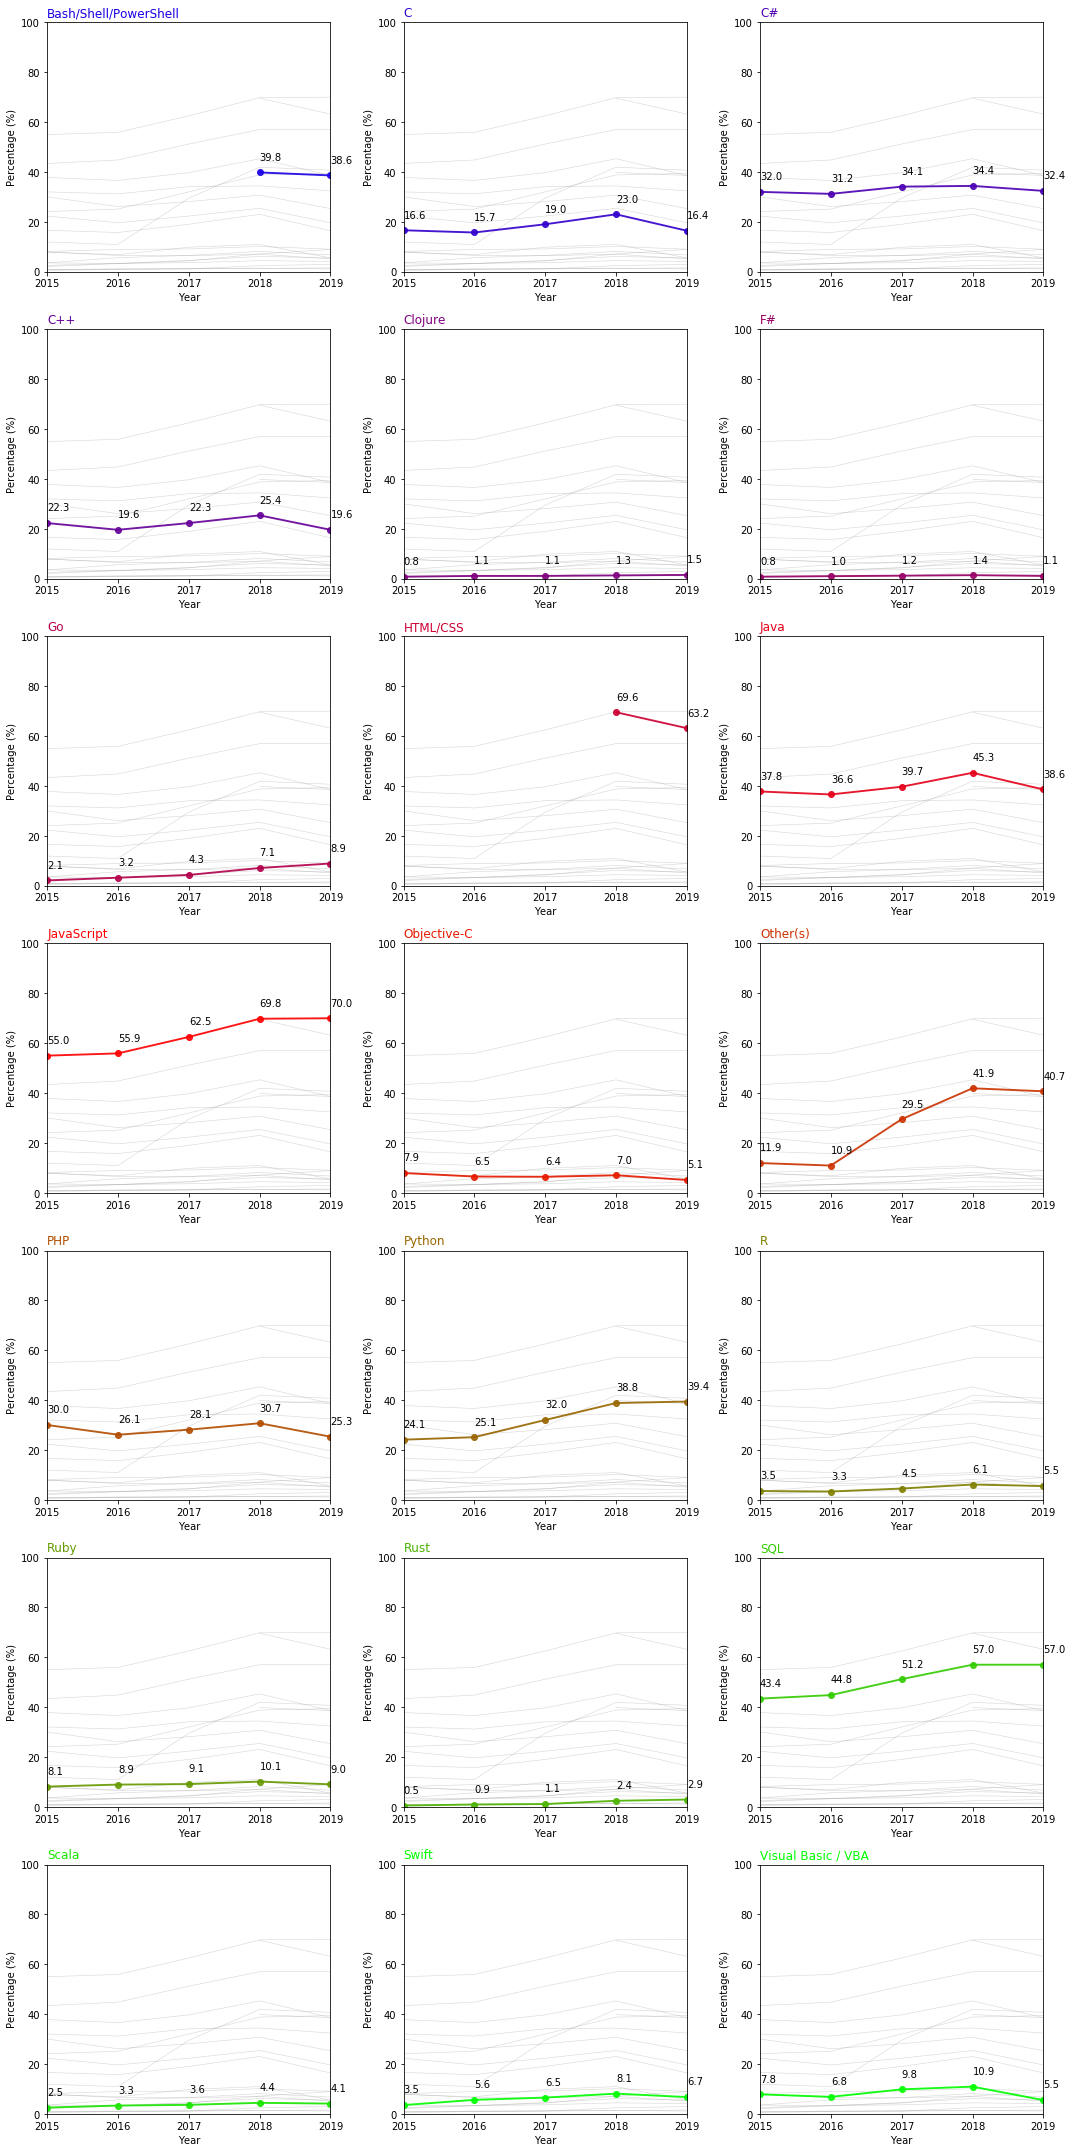

In [99]:
#visualize subplots
v.plot_subplots(df_lang_5yr_rounded)

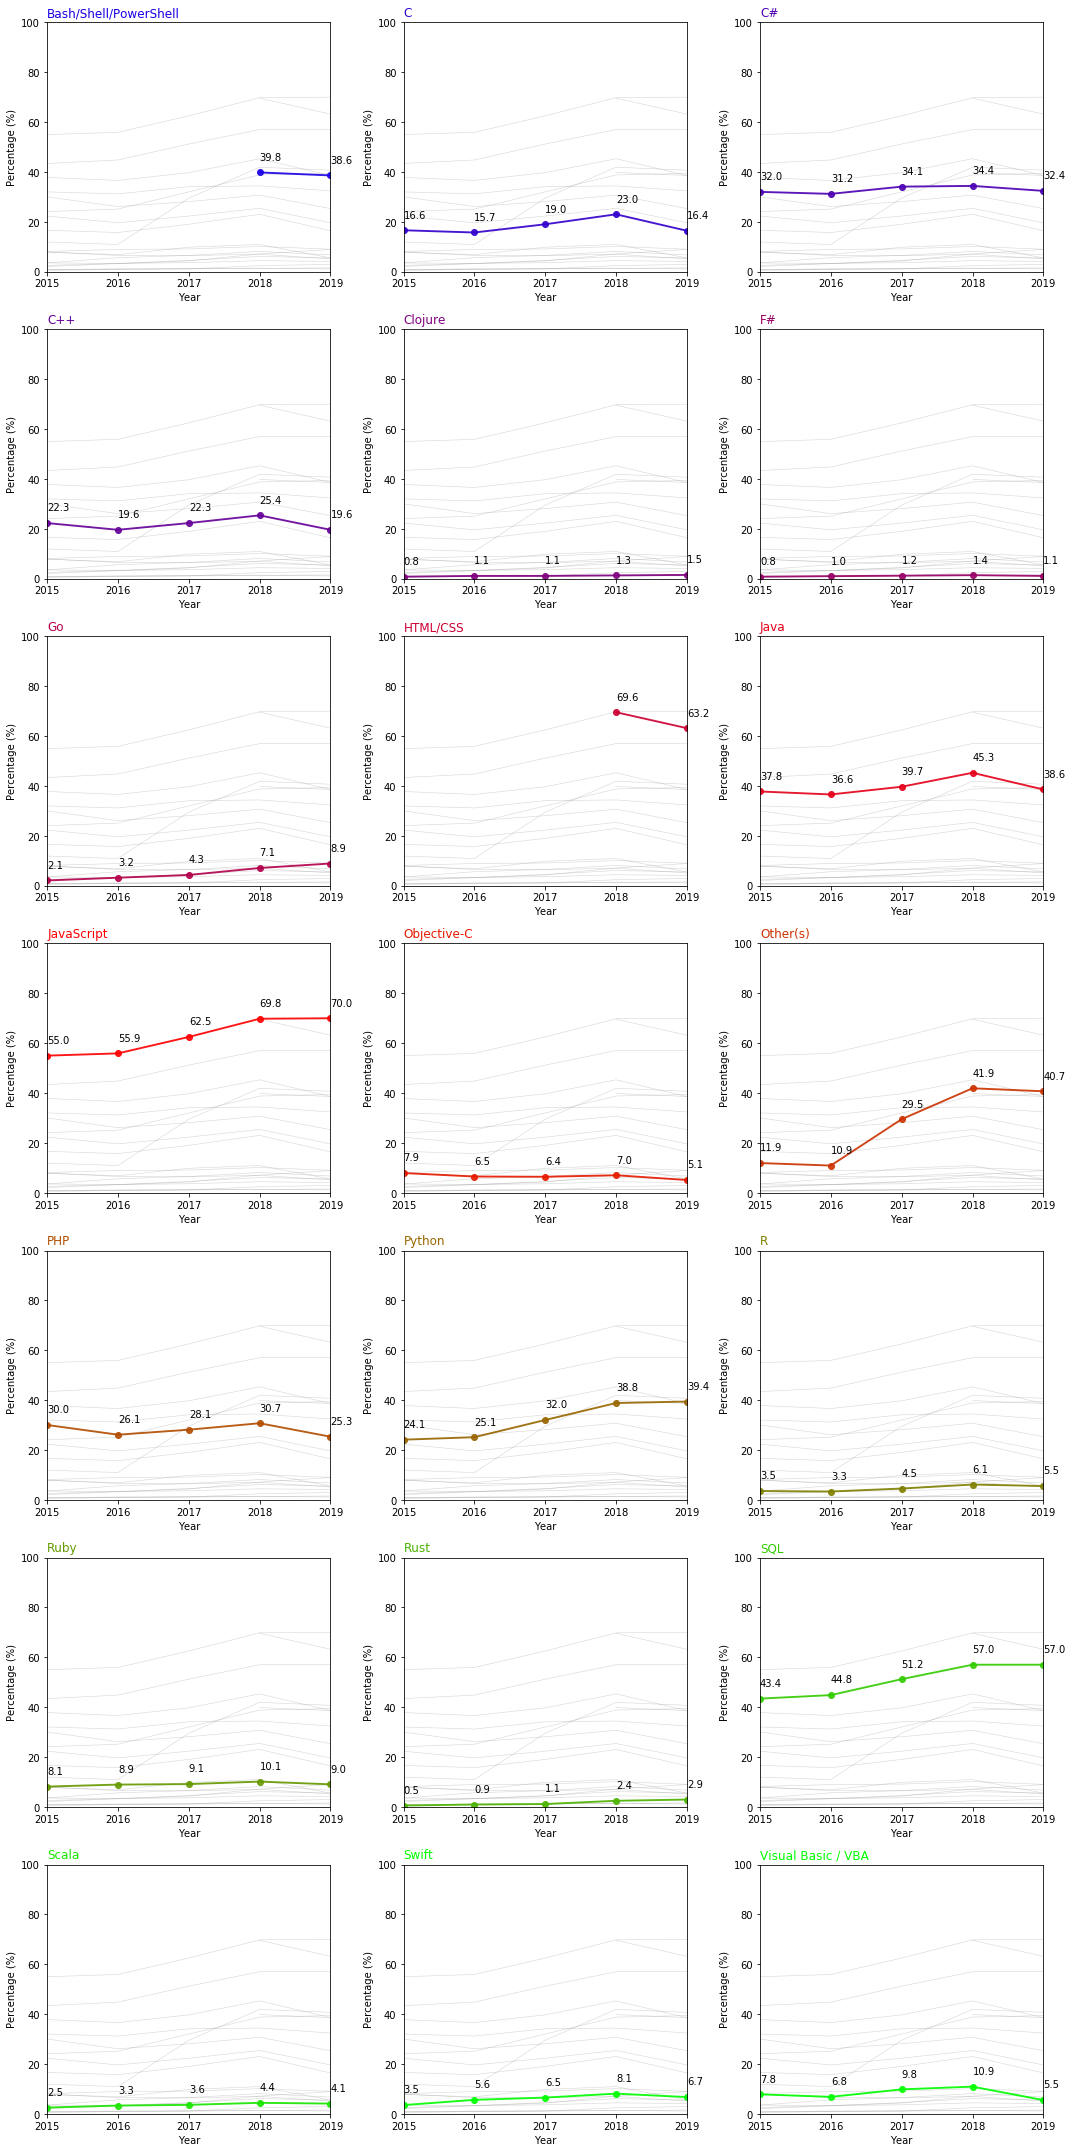

In [101]:
#save the created plot
fig = v.plot_subplots(df_lang_5yr_rounded)
plt.savefig('df_lang_5yr_subplots.png')

In [337]:
df2019_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, Respondent to Extraversion_Online
Columns: 548 entries, Respondent to Extraversion_Online
dtypes: float64(548)
memory usage: 2.3+ MB


In [340]:
for feat in df2019_corr:
    print((df2019_corr[feat])[df2019_corr[feat] > 0.05].sort_values(ascending = False))

Respondent    1.0
Name: Respondent, dtype: float64
OpenSourcer                                          1.000000
SOPartFreq                                           0.188155
PurchaseWhat                                         0.168327
CodeRev                                              0.163980
ImpSyn                                               0.159820
WorkRemote                                           0.138066
OpSys_Linux-based                                    0.135684
SocialMedia_Twitter                                  0.112299
YearsCode                                            0.111288
UnitTests                                            0.107472
PurchaseHow                                          0.103102
CodeRevHrs                                           0.094791
OpSys_MacOS                                          0.088645
CareerSat                                            0.067669
EdLevel_Other doctoral degree (Ph.D, Ed.D., etc.)    0.065798
JobSat             

TypeError: sort_values() missing 1 required positional argument: 'by'

In [4]:
df2019_ini.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'Employment',
       'Country', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize',
       'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat',
       'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate',
       'JobFactors', 'ResumeUpdate', 'CompFreq', 'ConvertedComp',
       'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc',
       'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow',
       'PurchaseWhat', 'LanguageWorkedWith', 'DatabaseWorkedWith',
       'PlatformWorkedWith', 'WebFrameWorkedWith', 'MiscTechWorkedWith',
       'DevEnviron', 'OpSys', 'Containers', 'BetterLife', 'ITperson',
       'SocialMedia', 'Extraversion', 'SOPartFreq', 'SONewContent', 'Age',
       'Gender', 'Trans', 'Ethnicity', 'Dependents'],
      dtype='object')

## Visualizing proportions of features

### Programming Languages

In [58]:
lang_vals_2019, lang_len_2019, lang_counts_2019, lang_prop_2019 = p.process_col_of_lists(df2019_ini, 'LanguageWorkedWith')

In [115]:
display(lang_counts_2019, lang_prop_2019)

Assembly                  2940
Bash/Shell/PowerShell    24598
C                        10485
C#                       20634
C++                      12515
Clojure                    964
Dart                      1119
Elixir                     993
Erlang                     581
F#                         720
Go                        5688
HTML/CSS                 40296
Java                     24585
JavaScript               44623
Kotlin                    4156
Objective-C               3281
Other(s):                 5760
PHP                      16155
Python                   25131
R                         3493
Ruby                      5765
Rust                      1848
SQL                      36364
Scala                     2636
Swift                     4255
TypeScript               15334
VBA                       3480
WebAssembly                664
dtype: int64

Erlang                    0.911301
WebAssembly               1.041487
F#                        1.129323
Clojure                   1.512038
Elixir                    1.557525
Dart                      1.755156
Rust                      2.898596
Scala                     4.134578
Assembly                  4.611403
Objective-C               5.146263
VBA                       5.458395
R                         5.478786
Kotlin                    6.518704
Swift                     6.673986
Go                        8.921653
Other(s):                 9.034586
Ruby                      9.042428
C                        16.445769
C++                      19.629833
TypeScript               24.051447
PHP                      25.339189
C#                       32.364520
Java                     38.561681
Bash/Shell/PowerShell    38.582072
Python                   39.418085
SQL                      57.037095
HTML/CSS                 63.204455
JavaScript               69.991373
dtype: float64

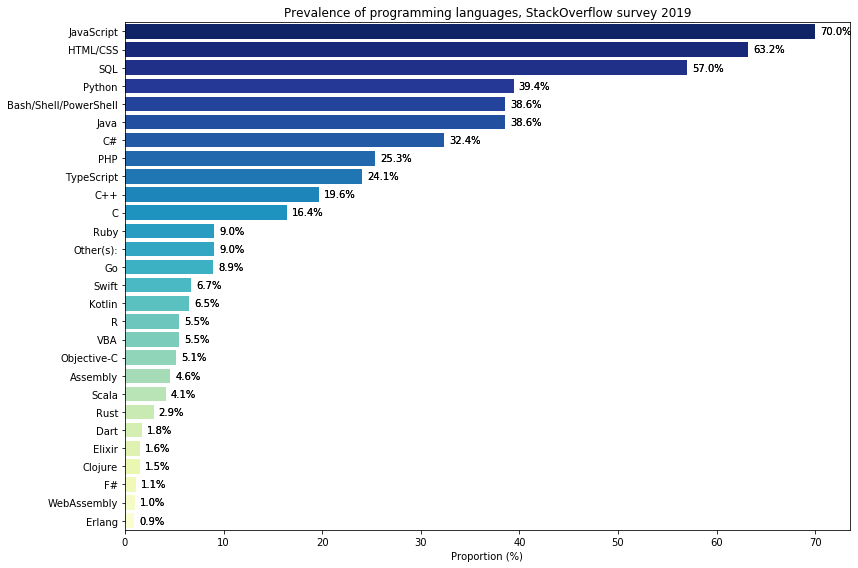

In [121]:
v.plot_barh(lang_prop_2019, title = 'Prevalence of programming languages, StackOverflow survey 2019', 
          xlabel = 'Proportion (%)')
#plt.savefig('lang_2019_prop_bar.png', bbox_inches = 'tight')

### Database Counts

In [118]:
db_vals_2019, db_len_2019, db_counts_2019, db_prop_2019 = p.process_col_of_lists(df2019_ini, 'DatabaseWorkedWith')
display(db_counts_2019, db_prop_2019)

Cassandra                2099
Couchbase                1223
DynamoDB                 3918
Elasticsearch            9199
Firebase                 6727
MariaDB                  9196
Microsoft SQL Server    19747
MongoDB                 14578
MySQL                   28833
Oracle                   9194
Other(s):                4101
PostgreSQL              20626
Redis                   11894
SQLite                  17181
dtype: int64

Couchbase                2.142307
Cassandra                3.676780
DynamoDB                 6.863089
Other(s):                7.183646
Firebase                11.783562
Oracle                  16.104961
MariaDB                 16.108464
Elasticsearch           16.113719
Redis                   20.834501
MongoDB                 25.536015
SQLite                  30.095642
Microsoft SQL Server    34.590457
PostgreSQL              36.130185
MySQL                   50.506236
dtype: float64

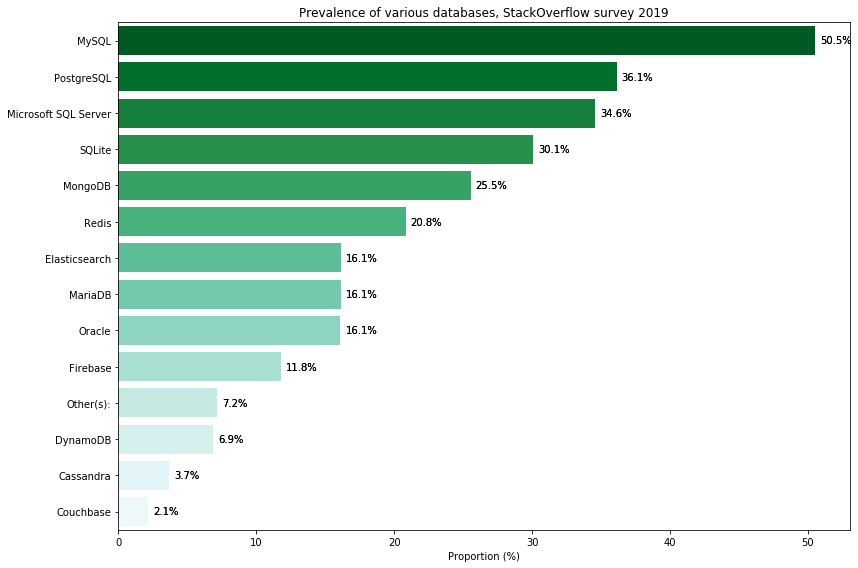

In [123]:
v.plot_barh(db_prop_2019, title = 'Prevalence of various databases, StackOverflow survey 2019', 
          xlabel = 'Proportion (%)', color_palette='BuGn')
plt.savefig('db_2019_prop_bar.png', bbox_inches = 'tight')

### Developer types

In [126]:
devtypes_vals_2019, devtypes_len_2019, devtypes_counts_2019, devtypes_prop_2019 = p.process_col_of_lists(df2019_ini, 'DevType')
display(devtypes_counts_2019, devtypes_prop_2019)

Academic researcher                               3852
Data or business analyst                          4838
Data scientist or machine learning specialist     4847
Database administrator                            7596
Designer                                          6423
DevOps specialist                                 7746
Developer, QA or test                             5276
Developer, back-end                              32762
Developer, desktop or enterprise applications    13802
Developer, embedded applications or devices       5574
Developer, front-end                             20975
Developer, full-stack                            34866
Developer, game or graphics                       2838
Developer, mobile                                11139
Educator                                          3188
Engineer, data                                    4628
Engineer, site reliability                        2416
Engineering manager                               3333
Marketing 

Marketing or sales professional                   0.868229
Senior executive/VP                               2.506456
Engineer, site reliability                        3.827812
Scientist                                         4.073388
Developer, game or graphics                       4.496411
Product manager                                   4.897254
Educator                                          5.050937
Engineering manager                               5.280669
Academic researcher                               6.102952
Student                                           7.064658
Engineer, data                                    7.332414
Data or business analyst                          7.665130
Data scientist or machine learning specialist     7.679389
Developer, QA or test                             8.359079
Developer, embedded applications or devices       8.831218
Designer                                         10.176339
System administrator                             10.8956

<center><h2>Programming Language Used in 2019 by developer types

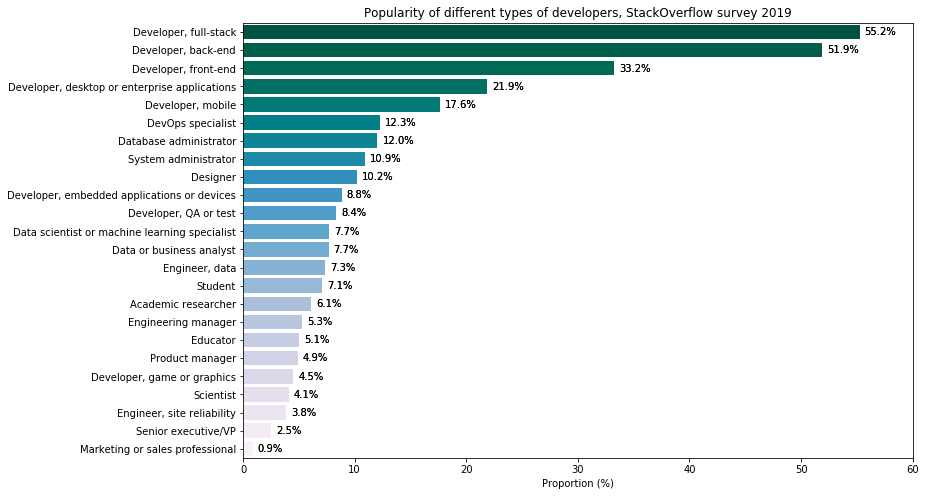

In [251]:
v.plot_barh(devtypes_prop_2019, title = 'Prevalence of various types of developers, StackOverflow survey 2019', 
          xlabel = 'Proportion (%)', color_palette='PuBuGn')
#plt.savefig('devtypes_prop_2019.png', bbox_inches = 'tight')

https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows/40449726#40449726

In [96]:
df2019_test = df2019_ini.copy()

In [97]:
df2019_explode = p.explode_col(df2019_test, 'DevType', ';')

In [131]:
df2019_explode

,Respondent,MainBranch,Hobbyist,OpenSourcer,Employment,Country,EdLevel,UndergradMajor,EduOther,OrgSize,...,ITperson,SocialMedia,Extraversion,SOPartFreq,SONewContent,Age,Gender,Trans,Ethnicity,Dependents
2,3,"I am not primarily a developer, but I write co...",Yes,Never,Employed full-time,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,...,Yes,Reddit,In real life (in person),Less than once per month or monthly,Tech meetups or events in your area;Courses on...,28.0,Man,No,NaN,Yes
2,3,"I am not primarily a developer, but I write co...",Yes,Never,Employed full-time,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,...,Yes,Reddit,In real life (in person),Less than once per month or monthly,Tech meetups or events in your area;Courses on...,28.0,Man,No,NaN,Yes
2,3,"I am not primarily a developer, but I write co...",Yes,Never,Employed full-time,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,...,Yes,Reddit,In real life (in person),Less than once per month or monthly,Tech meetups or events in your area;Courses on...,28.0,Man,No,NaN,Yes
2,3,"I am not primarily a developer, but I write co...",Yes,Never,Employed full-time,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,...,Yes,Reddit,In real life (in person),Less than once per month or monthly,Tech meetups or events in your area;Courses on...,28.0,Man,No,NaN,Yes
3,4,I am a developer by profession,No,Never,Employed full-time,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,...,SIGH,Reddit,In real life (in person),Less than once per month or monthly,Tech articles written by other developers;Indu...,22.0,Man,No,White or of European descent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88266,88882,I am a developer by profession,Yes,Never,Employed full-time,Netherlands,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Participated in online coding competitions (e....,100 to 499 employees,...,Yes,Instagram,Neither,Less than once per month or monthly,NaN,NaN,Man,No,White or of European descent,Yes
88266,88882,I am a developer by profession,Yes,Never,Employed full-time,Netherlands,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Participated in online coding competitions (e....,100 to 499 employees,...,Yes,Instagram,Neither,Less than once per month or monthly,NaN,NaN,Man,No,White or of European descent,Yes
88266,88882,I am a developer by profession,Yes,Never,Employed full-time,Netherlands,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Participated in online coding competitions (e....,100 to 499 employees,...,Yes,Instagram,Neither,Less than once per month or monthly,NaN,NaN,Man,No,White or of European descent,Yes
88267,88883,I am a developer by profession,Yes,Once a month or more often,Employed full-time,Greece,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...",20 to 99 employees,...,SIGH,Reddit,In real life (in person),A few times per month or weekly,Tech articles written by other developers,33.0,Man,No,White or of European descent,No


In [93]:
dev_types_list = p.get_vals(df2019_ini, 'DevType')
dev_types_list

0                               Academic researcher
1                          Data or business analyst
2     Data scientist or machine learning specialist
3                            Database administrator
4                                          Designer
5                                 DevOps specialist
6                             Developer, QA or test
7                               Developer, back-end
8     Developer, desktop or enterprise applications
9       Developer, embedded applications or devices
10                             Developer, front-end
11                            Developer, full-stack
12                      Developer, game or graphics
13                                Developer, mobile
14                                         Educator
15                                   Engineer, data
16                       Engineer, site reliability
17                              Engineering manager
18                  Marketing or sales professional
19          

In [98]:
#for each developer type, create a sliced dataframe.
dfs_by_devtype = p.sep_by_col(df2019_explode, 'DevType', ';', dev_types_list)

In [135]:
dfs_by_devtype['Developer, full-stack']

,Respondent,MainBranch,Hobbyist,OpenSourcer,Employment,Country,EdLevel,UndergradMajor,EduOther,OrgSize,...,ITperson,SocialMedia,Extraversion,SOPartFreq,SONewContent,Age,Gender,Trans,Ethnicity,Dependents
2,3,"I am not primarily a developer, but I write co...",Yes,Never,Employed full-time,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,...,Yes,Reddit,In real life (in person),Less than once per month or monthly,Tech meetups or events in your area;Courses on...,28.0,Man,No,NaN,Yes
3,4,I am a developer by profession,No,Never,Employed full-time,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,...,SIGH,Reddit,In real life (in person),Less than once per month or monthly,Tech articles written by other developers;Indu...,22.0,Man,No,White or of European descent,No
4,5,I am a developer by profession,Yes,Once a month or more often,Employed full-time,Ukraine,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,"10,000 or more employees",...,Also Yes,Facebook,In real life (in person),A few times per month or weekly,Tech meetups or events in your area;Courses on...,30.0,Man,No,White or of European descent;Multiracial,No
8,9,I am a developer by profession,Yes,Once a month or more often,Employed full-time,New Zealand,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,...,SIGH,Twitter,In real life (in person),Less than once per month or monthly,NaN,23.0,Man,No,White or of European descent,No
9,10,I am a developer by profession,Yes,Once a month or more often,Employed full-time,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,NaN,"10,000 or more employees",...,Yes,YouTube,Neither,A few times per month or weekly,Tech articles written by other developers;Tech...,NaN,NaN,NaN,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88257,88873,I am a developer by profession,Yes,Less than once a month but more than once per ...,"Independent contractor, freelancer, or self-em...",Canada,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...","Just me - I am a freelancer, sole proprietor, ...",...,Also Yes,YouTube,In real life (in person),A few times per week,Tech articles written by other developers;Indu...,37.0,Man,No,White or of European descent,No
88261,88877,I am a developer by profession,Yes,Less than once per year,Employed full-time,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,500 to 999 employees,...,Yes,Facebook,Online,I have never participated in Q&A on Stack Over...,Tech articles written by other developers;Cour...,48.0,Man,No,South Asian,Yes
88262,88878,I am a developer by profession,Yes,Less than once per year,Employed full-time,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,20 to 99 employees,...,Yes,Twitter,Online,A few times per week,Tech articles written by other developers;Indu...,26.0,Man,No,South Asian,No
88265,88881,I am a developer by profession,Yes,Once a month or more often,Employed full-time,Austria,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,...,Yes,NaN,Online,Less than once per month or monthly,NaN,37.0,Man,No,White or of European descent,No


In [136]:
dfs_by_devtype['Academic researcher']['LanguageWorkedWith']

4              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
32                                            C++;Python;R
41                      HTML/CSS;JavaScript;PHP;TypeScript
111      Assembly;C;C++;C#;HTML/CSS;Java;JavaScript;Pyt...
128                                           C++;Python;R
                               ...                        
88011                                   Python;R;Other(s):
88018                           C#;HTML/CSS;JavaScript;SQL
88173    Bash/Shell/PowerShell;C++;C#;HTML/CSS;JavaScri...
88179                         Bash/Shell/PowerShell;C#;SQL
88266               C#;HTML/CSS;Java;JavaScript;PHP;Python
Name: LanguageWorkedWith, Length: 3852, dtype: object

In [137]:
dfs_by_devtype['Academic researcher']

,Respondent,MainBranch,Hobbyist,OpenSourcer,Employment,Country,EdLevel,UndergradMajor,EduOther,OrgSize,...,ITperson,SocialMedia,Extraversion,SOPartFreq,SONewContent,Age,Gender,Trans,Ethnicity,Dependents
4,5,I am a developer by profession,Yes,Once a month or more often,Employed full-time,Ukraine,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,"10,000 or more employees",...,Also Yes,Facebook,In real life (in person),A few times per month or weekly,Tech meetups or events in your area;Courses on...,30.0,Man,No,White or of European descent;Multiracial,No
32,33,I am a developer by profession,No,Less than once a month but more than once per ...,Employed full-time,Argentina,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","A natural science (ex. biology, chemistry, phy...",Taken an online course in programming or softw...,"10,000 or more employees",...,Yes,WhatsApp,In real life (in person),A few times per week,Tech articles written by other developers;Tech...,25.0,Man,No,Hispanic or Latino/Latina,No
41,42,I am a developer by profession,Yes,Less than once a month but more than once per ...,Employed full-time,Bangladesh,"Secondary school (e.g. American high school, G...",NaN,Taken a part-time in-person course in programm...,"Just me - I am a freelancer, sole proprietor, ...",...,Yes,Facebook,Online,Daily or almost daily,Tech articles written by other developers;Tech...,30.0,Man,No,Middle Eastern,NaN
111,112,I am a developer by profession,Yes,Once a month or more often,"Independent contractor, freelancer, or self-em...",South Korea,"Secondary school (e.g. American high school, G...",NaN,"Taught yourself a new language, framework, or ...","Just me - I am a freelancer, sole proprietor, ...",...,Yes,Facebook,Online,Multiple times per day,Tech articles written by other developers;Indu...,19.0,Man,No,East Asian,No
128,129,"I am not primarily a developer, but I write co...",Yes,Never,Employed full-time,United States,"Other doctoral degree (Ph.D, Ed.D., etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...","1,000 to 4,999 employees",...,Yes,YouTube,In real life (in person),Less than once per month or monthly,Tech articles written by other developers;Indu...,34.0,Man,No,White or of European descent,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88011,88624,"I am not primarily a developer, but I write co...",No,Never,Employed full-time,United States,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Mathematics or statistics,Taken an online course in programming or softw...,500 to 999 employees,...,"Fortunately, someone else has that title",NaN,In real life (in person),I have never participated in Q&A on Stack Over...,Tech articles written by other developers;Indu...,42.0,Man,No,White or of European descent,Yes
88018,88631,I am a developer by profession,Yes,Never,Employed full-time,Bangladesh,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,20 to 99 employees,...,Yes,Facebook,Online,A few times per week,Tech articles written by other developers;Indu...,34.0,Man,No,East Asian,No
88173,88786,I am a developer by profession,Yes,Less than once a month but more than once per ...,Employed full-time,Canada,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,2-9 employees,...,Yes,Reddit,In real life (in person),Less than once per month or monthly,Tech articles written by other developers;Indu...,28.0,Man,No,White or of European descent,No
88179,88792,I am a developer by profession,Yes,Once a month or more often,Employed full-time,Ukraine,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...

In [99]:
def clean_dfs(df_dict):
    df_new = pd.DataFrame()
    for val in df_dict:
        #create bool tables for language worked with
        df_bool, df_vals, df_len = p.col_of_lists_to_bool(dfs_by_devtype[val], 'LanguageWorkedWith', ';')

        #clean the bool table to match with the common list
        df_matched = p.clean_lang_2019(df_bool)
        
        #create a series and df counts tables of language use for each developer type df
        s_counts, df_counts, s_prop = p.make_counts_and_prop(df_matched, df_len, val, 'Language')
        df_new = pd.concat([df_new, s_prop], axis = 1, sort = True)
    return df_new

In [104]:
df_lang_by_devtype = clean_dfs(dfs_by_devtype)
df_lang_by_devtype

,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices",...,Educator,"Engineer, data","Engineer, site reliability",Engineering manager,Marketing or sales professional,Product manager,Scientist,Senior executive/VP,Student,System administrator
Bash/Shell/PowerShell,44.281984,41.076252,47.122153,46.783780,35.514165,64.987699,47.072243,41.590888,40.536415,49.324689,...,42.537783,51.018198,67.330017,51.127820,36.044362,40.885417,50.429017,48.477157,38.923908,60.262391
C,31.644909,14.502389,22.111801,17.223616,19.799656,16.988217,20.399240,16.325281,22.067161,49.522780,...,22.481108,21.793761,19.941957,19.969925,14.787431,17.740885,32.176287,19.923858,30.504277,22.084548
C#,24.464752,34.489923,22.712215,41.672170,37.580216,33.536191,38.384030,35.430636,55.553133,40.014407,...,31.013854,27.123050,24.336650,31.308271,25.508318,35.481771,21.177847,34.200508,33.430887,31.778426
C++,38.198433,17.224185,29.751553,19.667151,23.070903,17.570892,23.098859,19.788127,30.157000,50.567261,...,25.094458,25.108319,19.361526,22.015038,16.451017,21.419271,41.224649,23.032995,33.926159,22.186589
Clojure,1.879896,1.475171,2.049689,1.334038,1.252152,2.110579,1.463878,1.778880,1.264719,1.242572,...,1.920655,2.339688,3.192371,2.646617,2.957486,1.985677,1.872075,3.489848,1.238181,1.880466
F#,1.148825,1.267401,1.283644,1.360454,1.048677,1.799819,1.653992,1.393099,2.027911,1.494688,...,1.857683,1.451473,1.741294,2.105263,2.587800,1.497396,1.716069,1.903553,1.215669,1.064140
Go,8.120104,6.669437,8.985507,10.844010,6.479887,20.199404,9.790875,11.190717,7.450211,10.318747,...,7.871537,12.261698,32.255390,15.759398,7.763401,9.830729,8.346334,13.895939,7.901846,14.475219
HTML/CSS,55.561358,62.622065,48.364389,76.528860,79.182971,66.852259,70.950570,64.731637,64.115424,55.681614,...,69.899244,55.437608,62.686567,65.984962,81.515712,73.795573,49.141966,73.857868,68.235029,73.702624
Java,39.765013,32.619988,35.010352,36.269978,36.813273,40.554189,44.182510,42.454303,42.411688,41.311003,...,42.821159,41.052860,39.676617,38.135338,27.171904,35.253906,32.605304,35.659898,50.742909,37.215743
JavaScript,56.318538,62.996052,51.262940,79.606393,80.763813,74.401139,74.771863,73.001439,68.621893,60.417792,...,72.386650,60.528596,70.439469,74.045113,80.221811,77.734375,48.088924,80.012690,69.203062,75.626822


In [144]:
df_lang_by_devtype.to_csv('./df_lang_by_devtype.csv')

In [102]:
df_lang_by_devtype = pd.read_csv('./df_lang_by_devtype.csv')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:1201: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


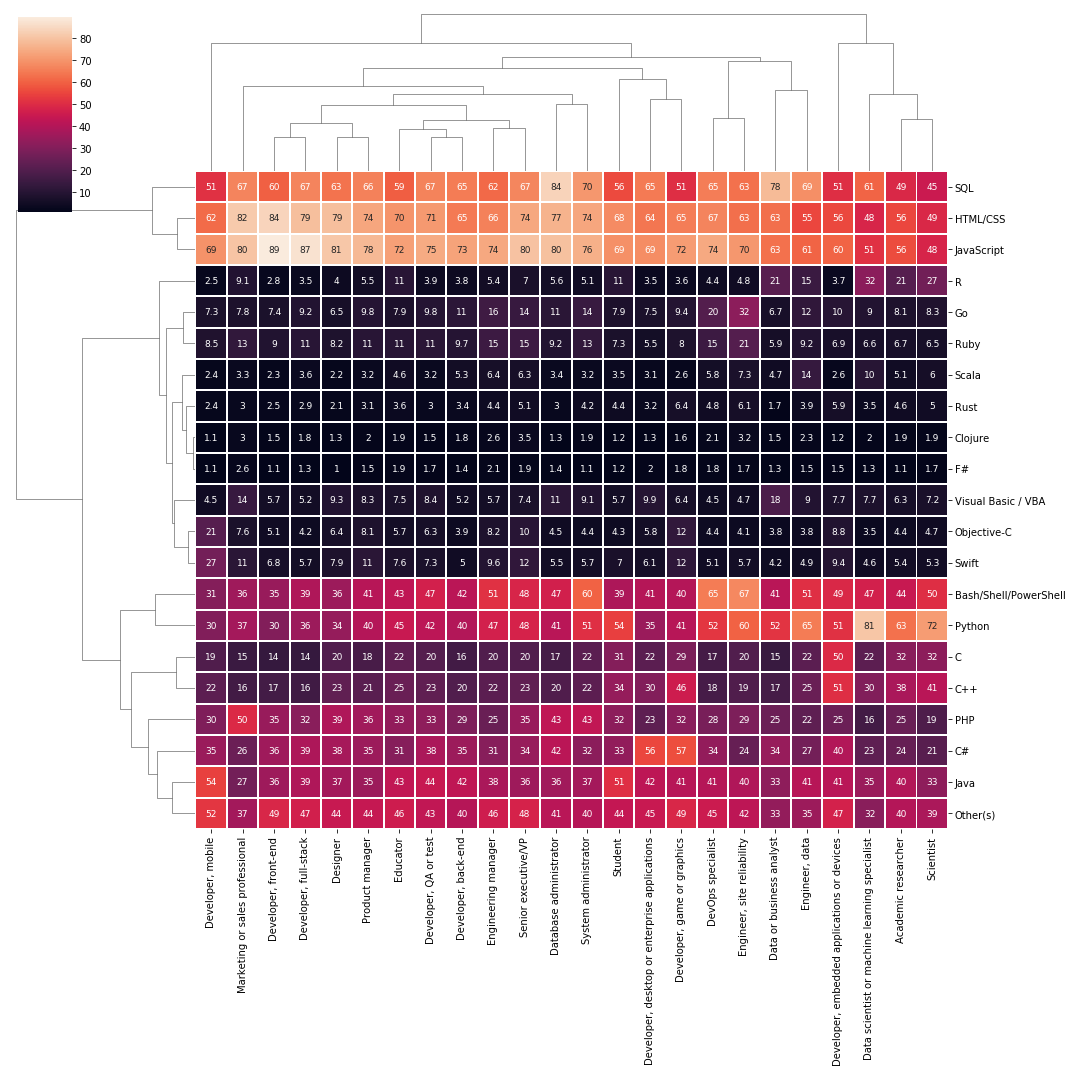

In [105]:
sns.clustermap(df_lang_by_devtype, linewidths = 1, square= True, figsize=(15, 15),
                  annot = True, annot_kws={"size": 9},
                  cbar=True) #cbar_kws={"shrink": 1}
#plt.tight_layout()
plt.savefig('df_lang_2019_clustermap.png')
#make the color bar horizontal at the bottom
#cbar_kws={'label': 'My Colorbar', 'orientation': 'horizontal'}

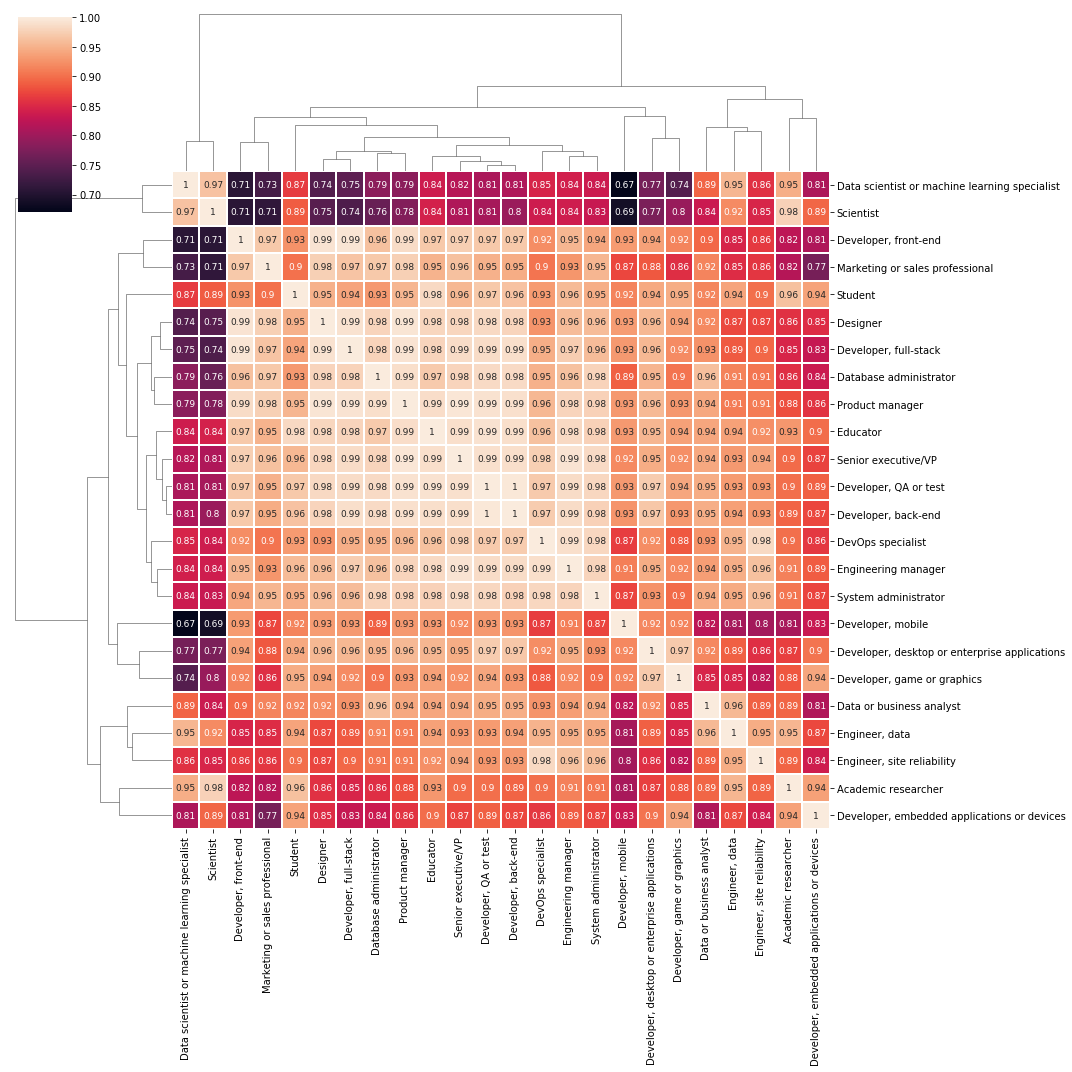

In [106]:
lang_by_devtype_corr = df_lang_by_devtype.corr()
lang_by_devtype_corr_clustermap = sns.clustermap(lang_by_devtype_corr, linewidths = 1, square= True, figsize=(15, 15),
                  annot = True, annot_kws={"size": 9},
                  cbar=True)
plt.savefig('df_lang_2019_corr_clustermap.png')

In [171]:
'''
cm = lang_by_devtype_corr_clustermap #for conciseness

mask = np.zeros_like(lang_by_devtype_corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
mask = mask[np.argsort(cm.dendrogram_row.reordered_ind),:]
mask = mask[:,np.argsort(cm.dendrogram_col.reordered_ind)]
'''

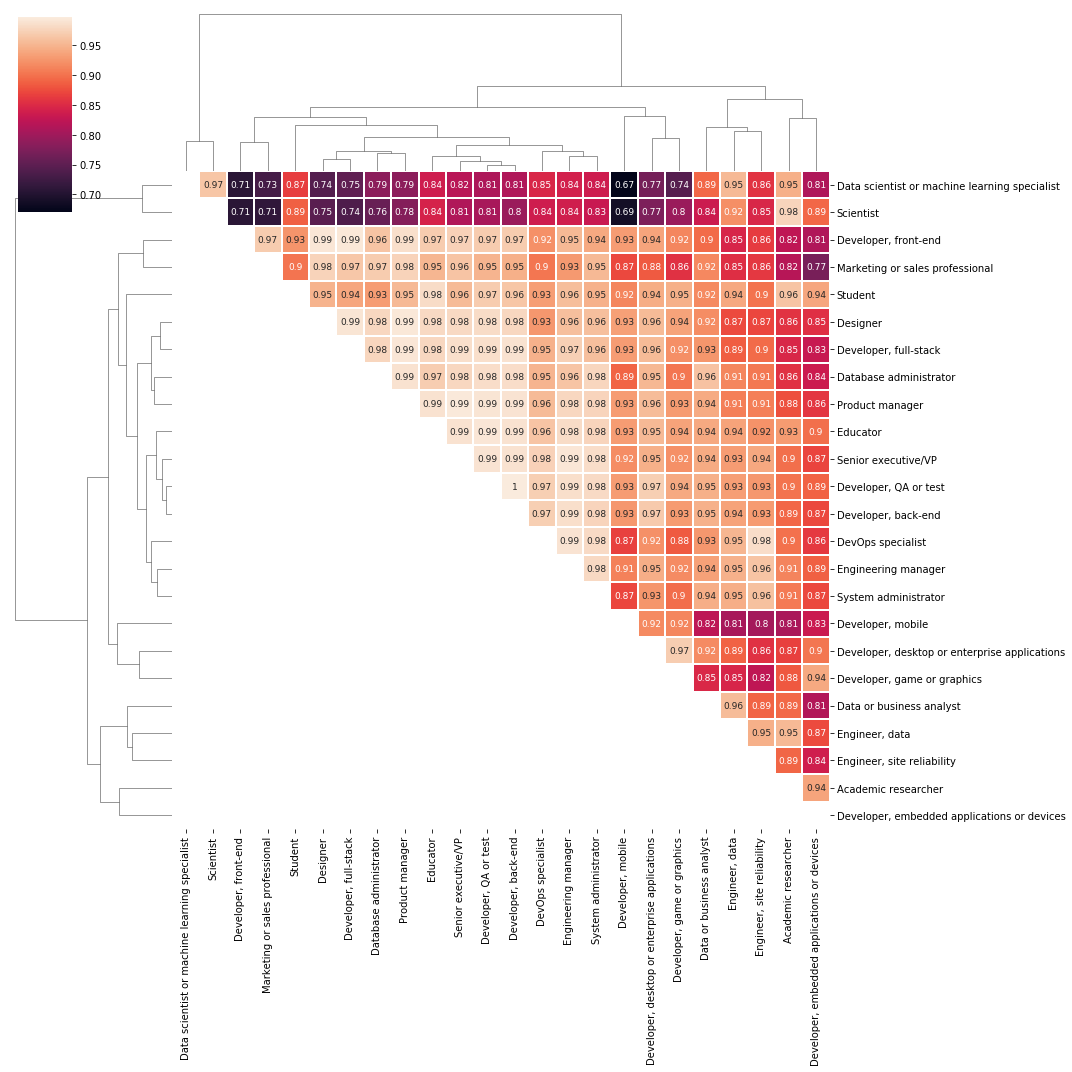

In [172]:
'''
cm_masked = sns.clustermap(lang_by_devtype_corr, mask = mask, linewidths = 1, square= True, figsize=(15, 15),
                  annot = True, annot_kws={"size": 9},
                  cbar=True)
'''

In [4]:
df2019_explode_lang = p.explode_col(df2019_ini, 'LanguageWorkedWith', ';')
df2019_explode_lang

,Respondent,MainBranch,Hobbyist,OpenSourcer,Employment,Country,EdLevel,UndergradMajor,EduOther,OrgSize,...,ITperson,SocialMedia,Extraversion,SOPartFreq,SONewContent,Age,Gender,Trans,Ethnicity,Dependents
2,3,"I am not primarily a developer, but I write co...",Yes,Never,Employed full-time,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,...,Yes,Reddit,In real life (in person),Less than once per month or monthly,Tech meetups or events in your area;Courses on...,28.0,Man,No,NaN,Yes
3,4,I am a developer by profession,No,Never,Employed full-time,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,...,SIGH,Reddit,In real life (in person),Less than once per month or monthly,Tech articles written by other developers;Indu...,22.0,Man,No,White or of European descent,No
3,4,I am a developer by profession,No,Never,Employed full-time,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,...,SIGH,Reddit,In real life (in person),Less than once per month or monthly,Tech articles written by other developers;Indu...,22.0,Man,No,White or of European descent,No
3,4,I am a developer by profession,No,Never,Employed full-time,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,...,SIGH,Reddit,In real life (in person),Less than once per month or monthly,Tech articles written by other developers;Indu...,22.0,Man,No,White or of European descent,No
3,4,I am a developer by profession,No,Never,Employed full-time,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,...,SIGH,Reddit,In real life (in person),Less than once per month or monthly,Tech articles written by other developers;Indu...,22.0,Man,No,White or of European descent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88267,88883,I am a developer by profession,Yes,Once a month or more often,Employed full-time,Greece,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...",20 to 99 employees,...,SIGH,Reddit,In real life (in person),A few times per month or weekly,Tech articles written by other developers,33.0,Man,No,White or of European descent,No
88267,88883,I am a developer by profession,Yes,Once a month or more often,Employed full-time,Greece,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...",20 to 99 employees,...,SIGH,Reddit,In real life (in person),A few times per month or weekly,Tech articles written by other developers,33.0,Man,No,White or of European descent,No
88267,88883,I am a developer by profession,Yes,Once a month or more often,Employed full-time,Greece,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...",20 to 99 employees,...,SIGH,Reddit,In real life (in person),A few times per month or weekly,Tech articles written by other developers,33.0,Man,No,White or of European descent,No
88267,88883,I am a developer by profession,Yes,Once a month or more often,Employed full-time,Greece,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...",20 to 99 employees,...,SIGH,Reddit,In real life (in person),A few times per month or weekly,Tech articles written by other developers,33.0,Man,No

In [5]:

#later
#df2019.groupby(['LanguageWorkedWith']).mean()['JobSat']
income_sortby_lang = df2019_explode_lang.groupby(['LanguageWorkedWith']).median()['ConvertedComp']

In [22]:
income_sortby_lang = income_sortby_lang.astype(int).sort_values(ascending = True)

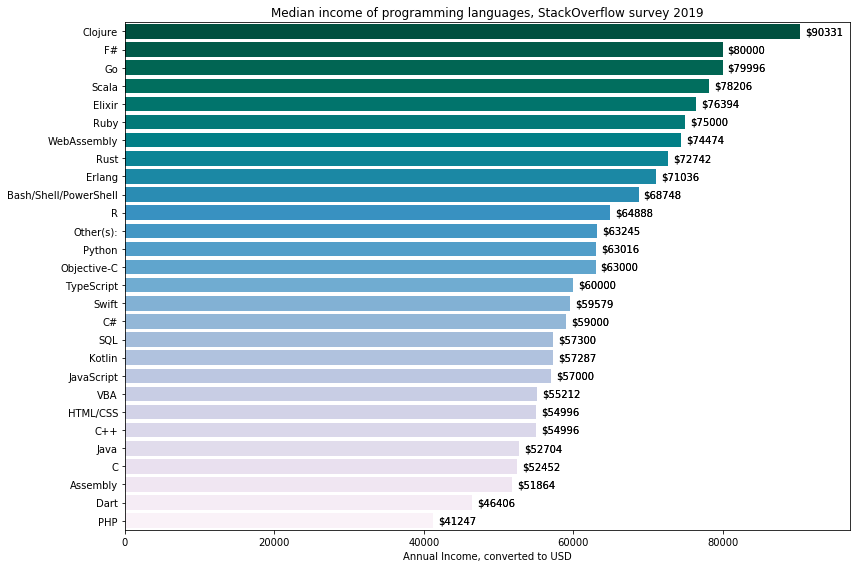

In [38]:
plot_barh(income_sortby_lang, title = 'Median income of programming languages, StackOverflow survey 2019', 
          xlabel = 'Annual Income, converted to USD', color_palette='PuBuGn', pre_unit = '$', round_place = 0, xulim_set=97000)
plt.savefig('income_sortby_lang.png', bbox_inches = 'tight')

In [69]:
#find the correlation between income by language and popularity of a language
income_sortby_lang.corr(lang_prop_2019)

-0.39952652292085405

In [78]:
income_sortby_lang_sorted = income_sortby_lang.sort_index()

In [79]:
lang_prop_2019_sorted = lang_prop_2019.sort_index()

In [82]:
# solve for line of best fit
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

best fit line:
y = 62.48 + -0.00x


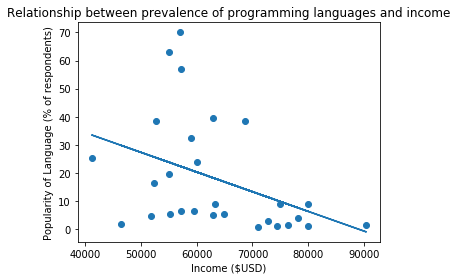

In [91]:
X, Y = income_sortby_lang_sorted, lang_prop_2019_sorted
# solution
a, b = best_fit(X, Y)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
import matplotlib.pyplot as plt
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)
plt.xlabel('Income ($USD)')
plt.ylabel('Popularity of Language (% of respondents)')
plt.title('Relationship between prevalence of programming languages and income')
plt.tight_layout()
plt.savefig('corr_income_langprop.png', bbox_inches = 'tight')

It seems that language choice, type of developer, and income are all related variables. This figure looks specifically at the median wage for each programming language. I chose to sort by median rather than mean because of the extreme skewedness of the data. 

# Findings

### Which are currently the most commonly used programming languages? 

JavaScript, HTML/CSS, and SQL appears to be the most overwhelmingly popular languages, with 70% (!!) of respondents using JavaScript. This makes sense considering that much of the internet is built using JavaScript and HTML/CSS. 

SQL's popularity is evident considering that it is the most popular database language by far. The database usage figure showcases how popular SQL is - the top 5 most used databases are all SQL-based, with 50% of respondents using MySQL.

### How much does programming language affect income?
Clojure, F#, and Go are among the top earners for programming languages. This agrees with https://insights.stackoverflow.com/survey/2019#top-paying-technologies which found Clojure, F#, Elixir, and Rust to be among the top paying technologies associated with earnings.

Popularity of an language is negatively correlated with the median income of a programmer who uses that language. The correlation is moderately significant at a Pearson coefficient of -0.4. Intuitively it makes sense that knowing a rarer language will net more income, but it also that the correlation wouldn't be strong since there are many other variables that influence income.


### How has the prevalence of programming language usage changed over the last 5 years?

Since the Stack Overflow surveys started from 2011, I thought it might be interesting to compare data from different years. I expected it to be a lot of work preprocessing data, and it was (of course?) worse than expected. Every survey had different language selections to choose from, for a total of 49 unique programming languages from the 2015–2019 surveys. These were condensed into 20 languages that are common to all years. Note that Bash/Shell and HTML/CSS were not included in the survey until 2018 and 2019, but I felt compelled to include them in the 5-year comparison due to the sheer popularity of these languages.

All of the other languages were slotted into the "Other(s)" category. Because the languages in this category differs year by year, this graph doesn't tell us much useful information - but it is critical in cleaning up the rest of the information.
I compared proportion of respondents (as opposed to counts) since each year has a different number of respondents. For visual clarity, I made individual graphs for each language in matplotlib.

Most languages don't seem to fluctuate in usage, although I only made a 5-year trend. Language use likely fluctuates much more in spans of decades.
There are a few languages that seem to be consistently increasing: Clojure, Go, JavaScript, Python, Rust, and SQL


### How do different types of developers differ in their choice of language?

To understand how developers differ in their choice of programming languages, first I wanted to get an idea of the prevalence of the different types of developers. Most developers had more than one of these titles, so the percentiles will not add up to 100%. Full-stack and back-end developers, at 55% and 52%, are the overwhelming majority of developers followed by front-end developers at 33%.

The clustermaps are heatmaps of the popularity of different languages compared to types of developers, and the correlation between the two features. I was able to discern different language and developer type clusters. 

### Interesting Findings
- Developers in general tend to learn the same languages, with JavaScript, HTML/CSS, and SQL being used by 70%, 63%, and 57% of developers, respectively.
- The programming languages that are consistently increasing in popularity within the past 5 years are Clojure, Go, JavaScript, Python, Rust, and SQL.
- Data scientists/ML specialists and scientists seem to be the most estranged compared to all other types of developers in terms of language choice.
- Knowing a less common programming language, such as Clojure and F#, is correlated with higher earnings